In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from math import pi
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
data_train =pd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')
data_test =pd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')

In [15]:
print("training ",data_train.shape)
print("testing ",data_test.shape)

training  (175341, 45)
testing  (175341, 45)


In [16]:
data_train.head(6)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0


In [17]:
data_test.head(6)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0


In [18]:
print(data_train.columns)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [19]:
print(data_test.columns)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


<Axes: xlabel='attack_cat', ylabel='count'>

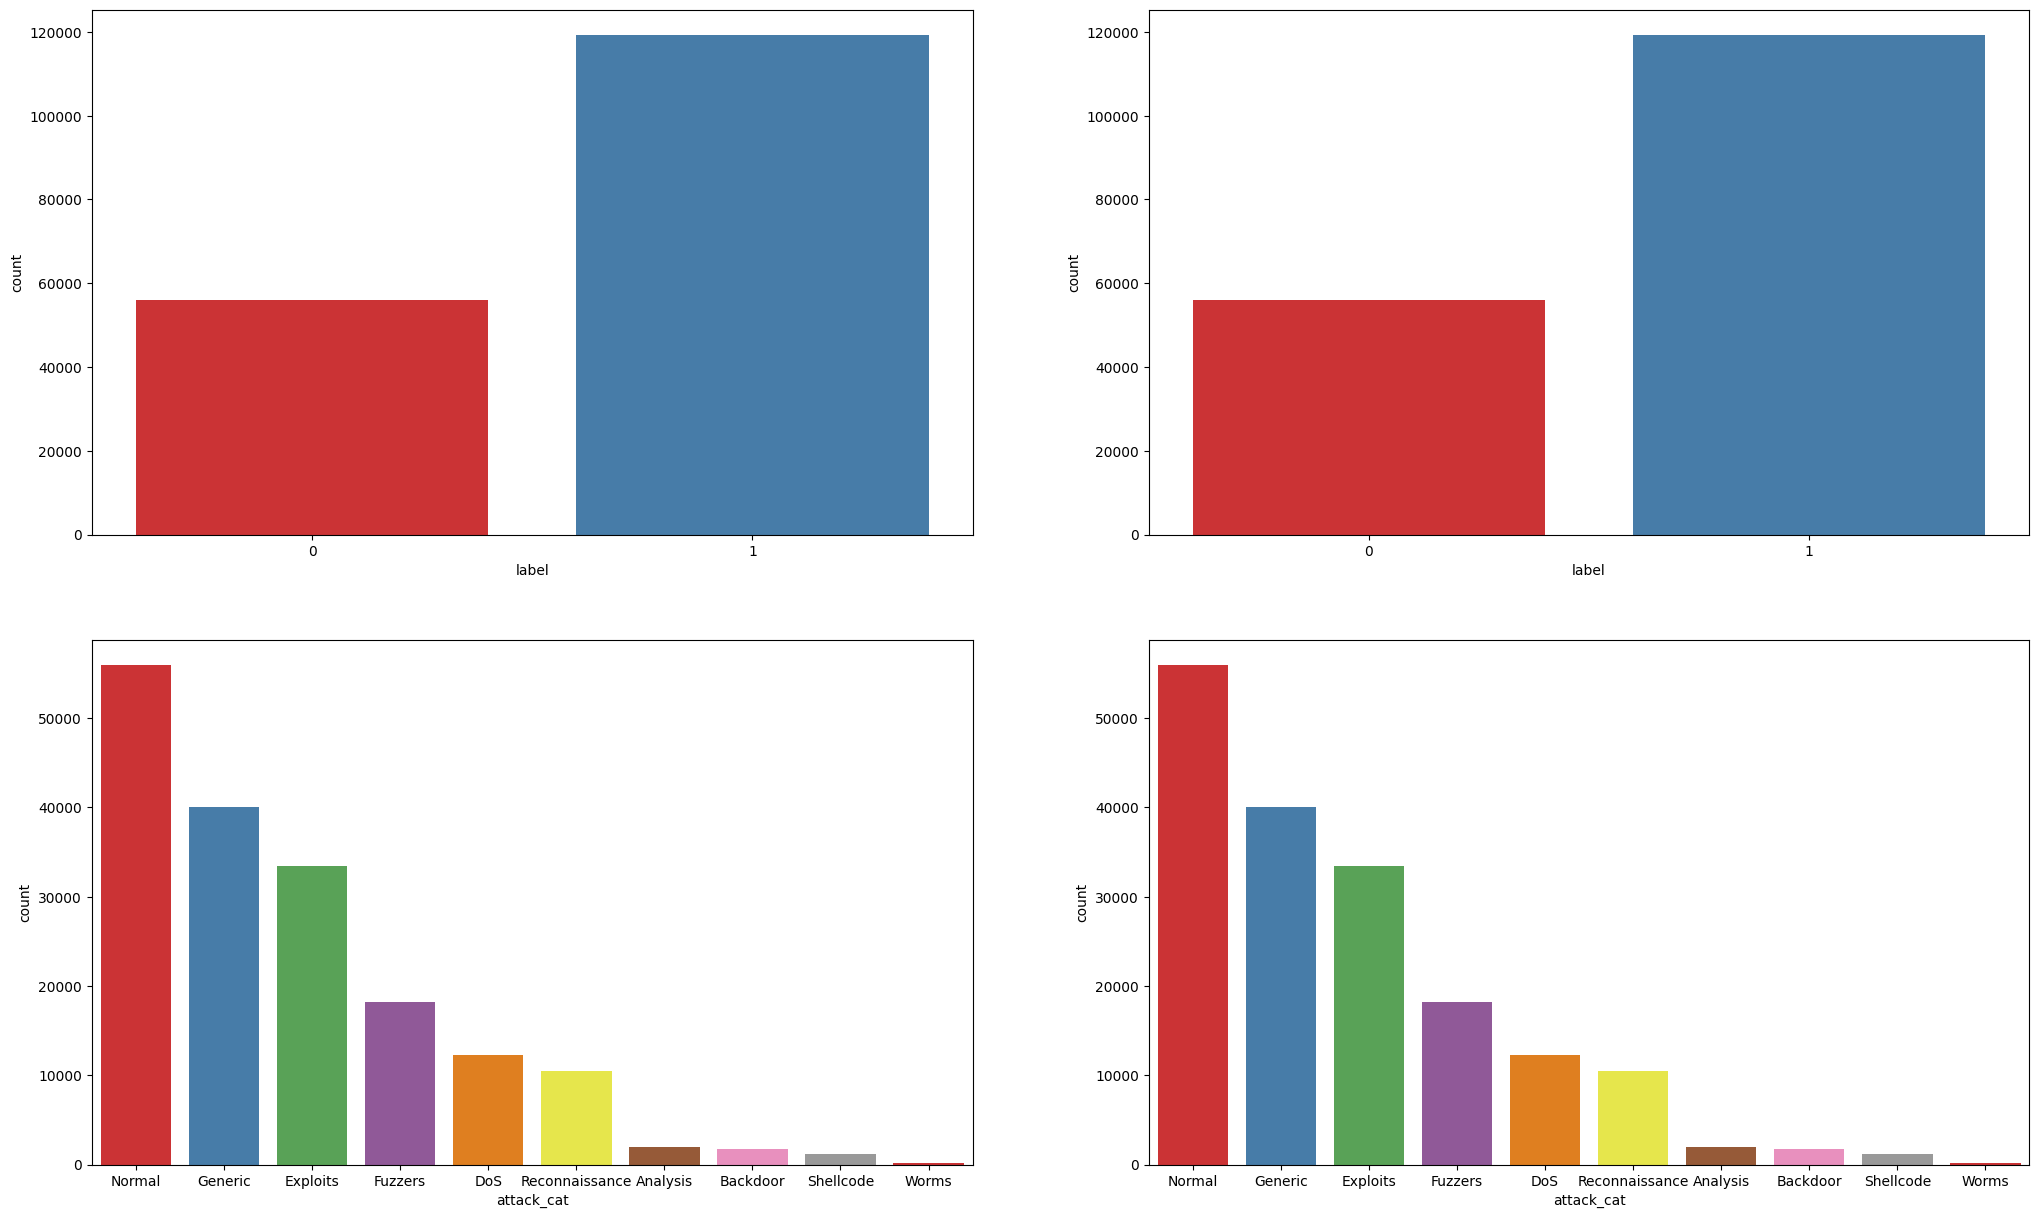

In [20]:
palette = sns.color_palette("Set1")
f, axes = plt.subplots(2, 2, figsize=(25, 15))

# Create the plots
sns.countplot(x="label", data=data_train, ax=axes[0,0], palette=palette)
sns.countplot(x="label", data=data_test, ax=axes[0,1], palette=palette)

sns.countplot(x="attack_cat", data=data_train, ax=axes[1,0], palette=palette, order = data_train['attack_cat'].value_counts().index)
sns.countplot(x="attack_cat", data=data_test, ax=axes[1,1], palette=palette, order = data_test['attack_cat'].value_counts().index)

In [21]:
df = pd.concat([data_train, data_test])
df.shape

(350682, 45)

In [22]:
num_features = df.columns[df.dtypes != 'object']
num_features

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

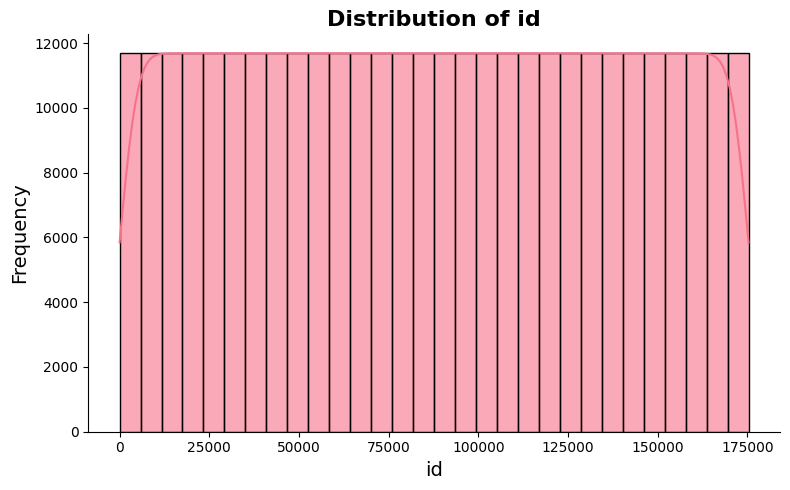

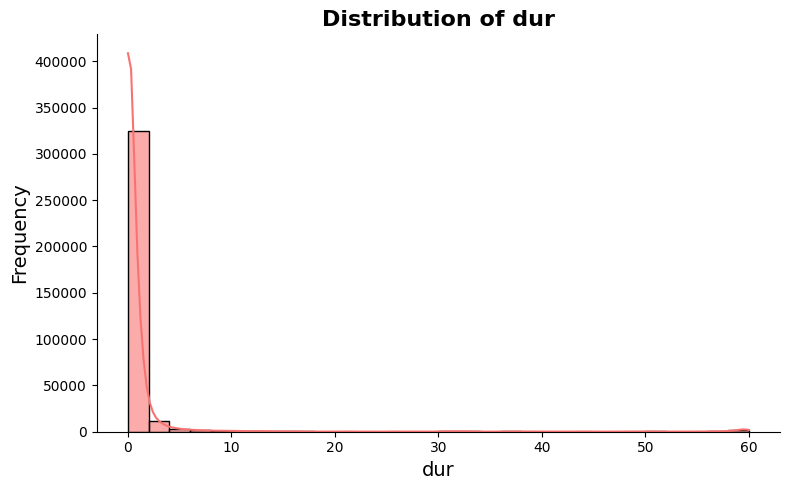

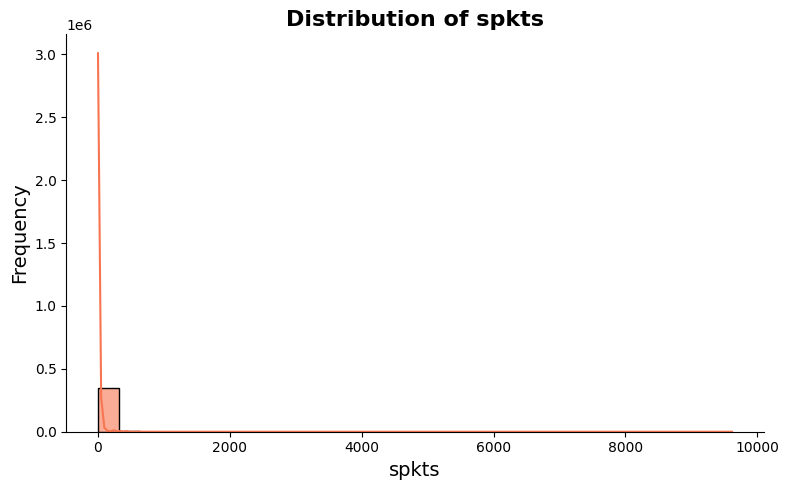

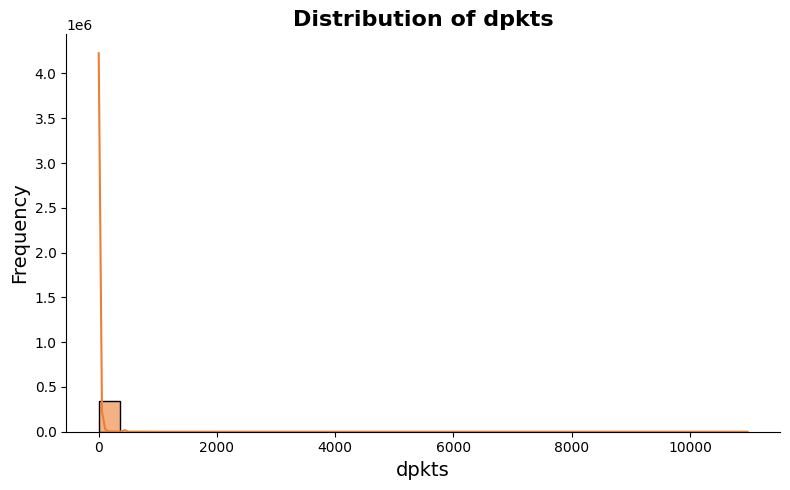

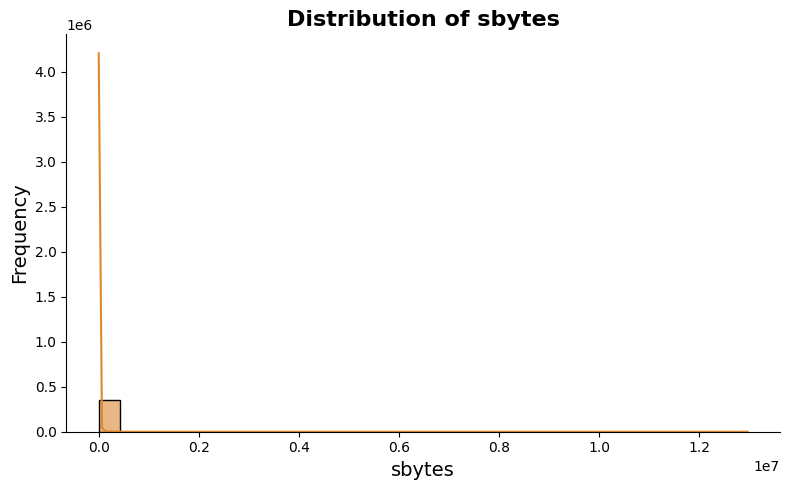

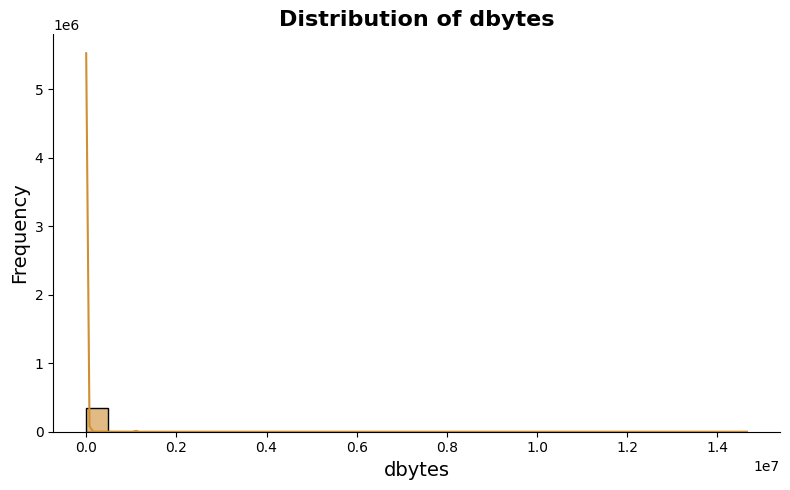

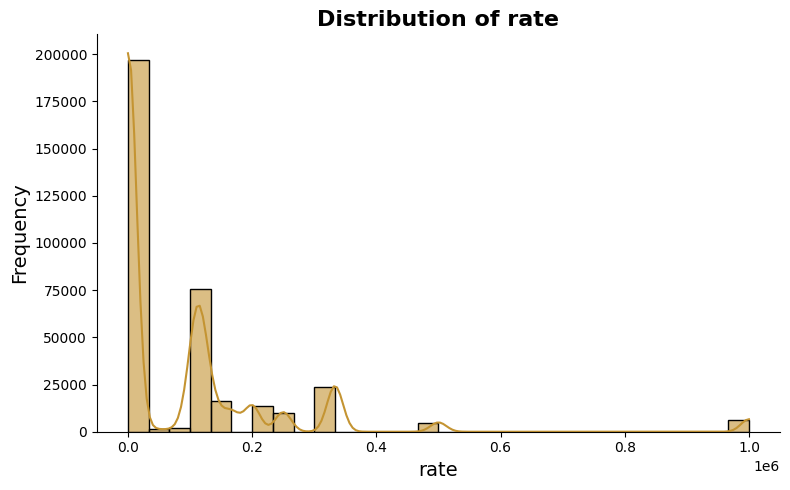

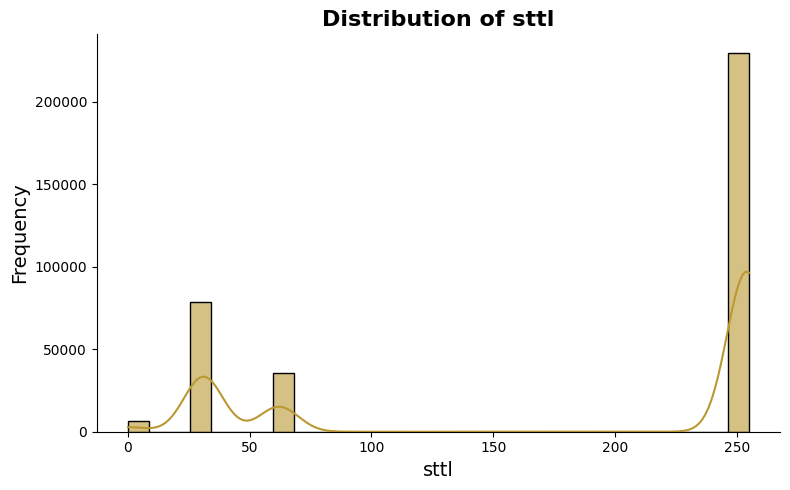

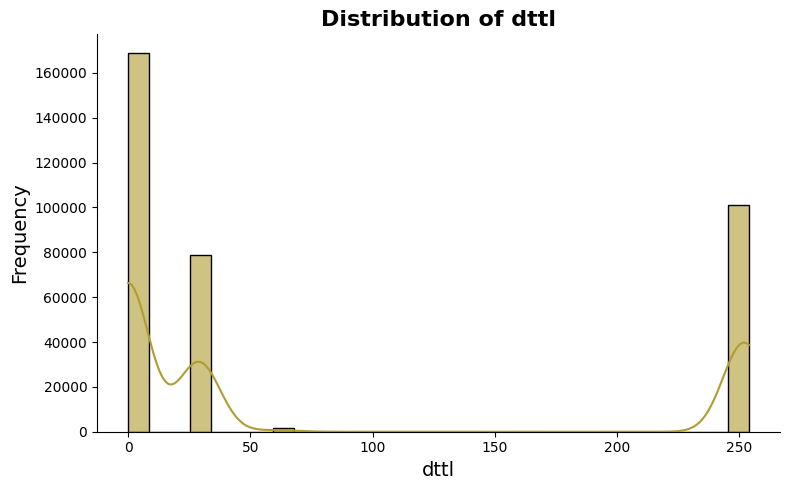

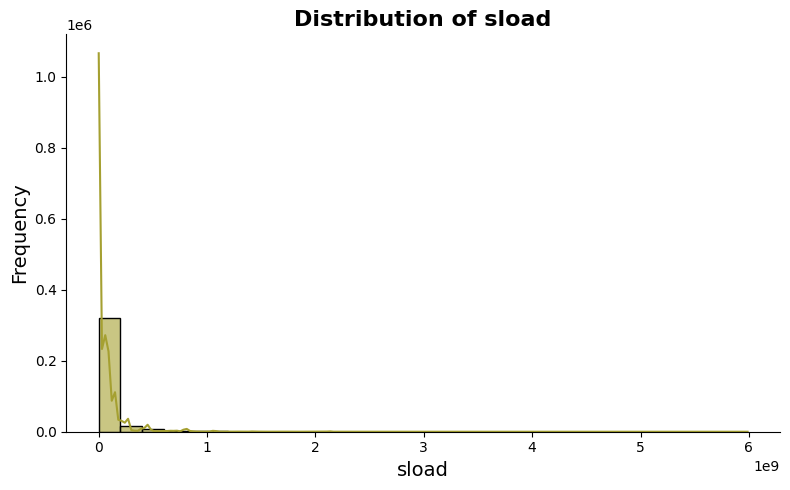

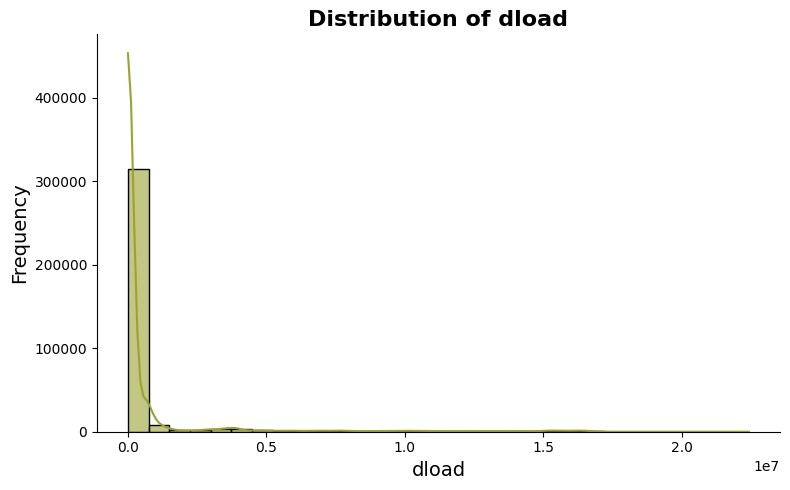

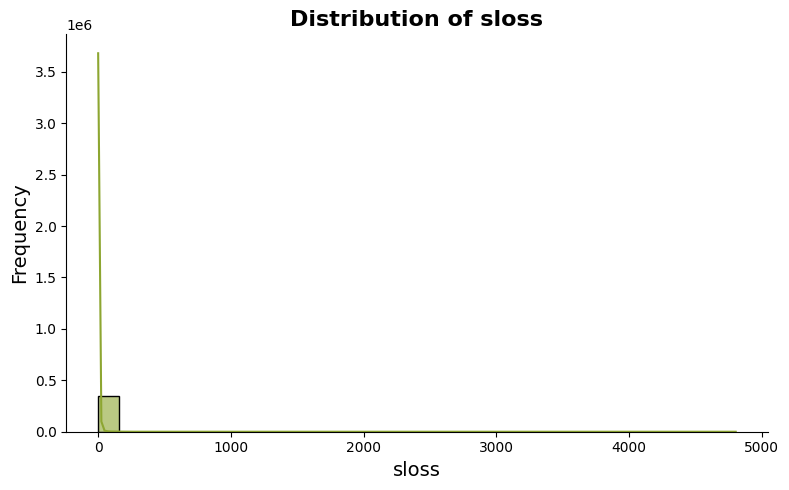

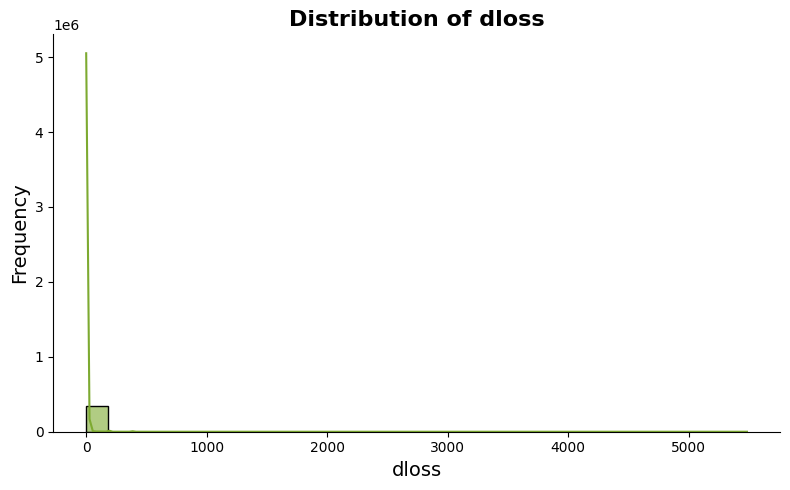

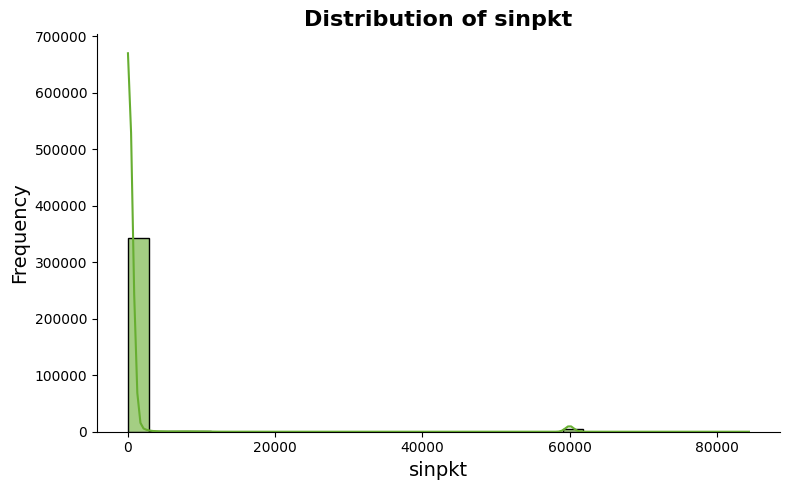

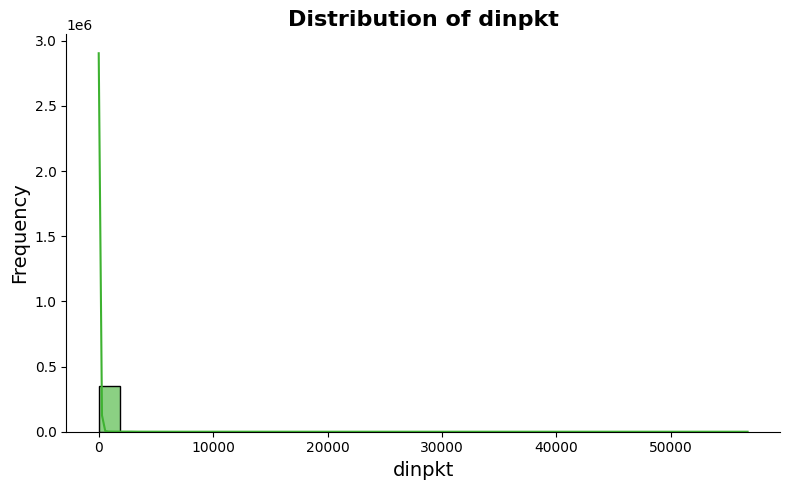

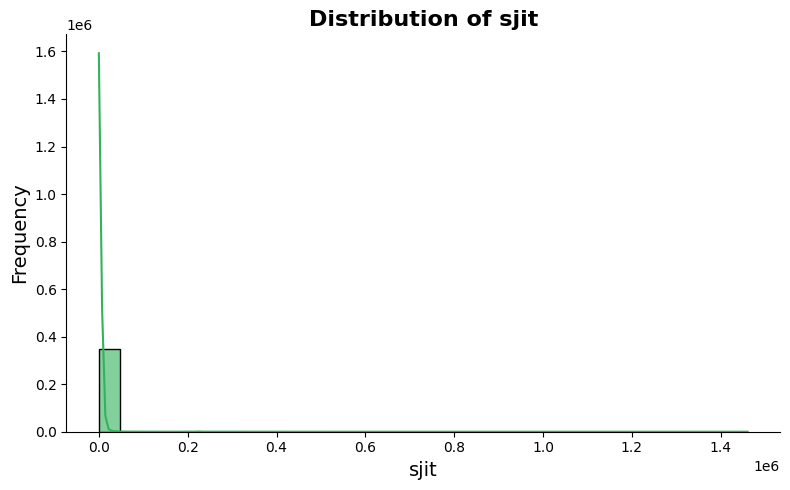

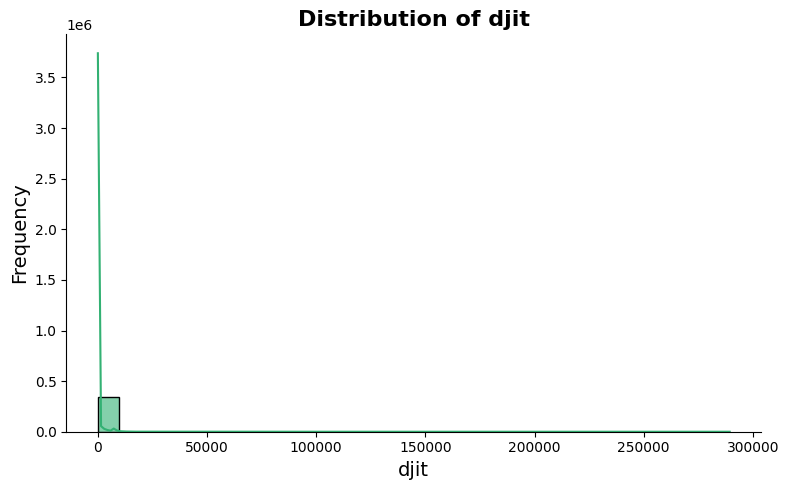

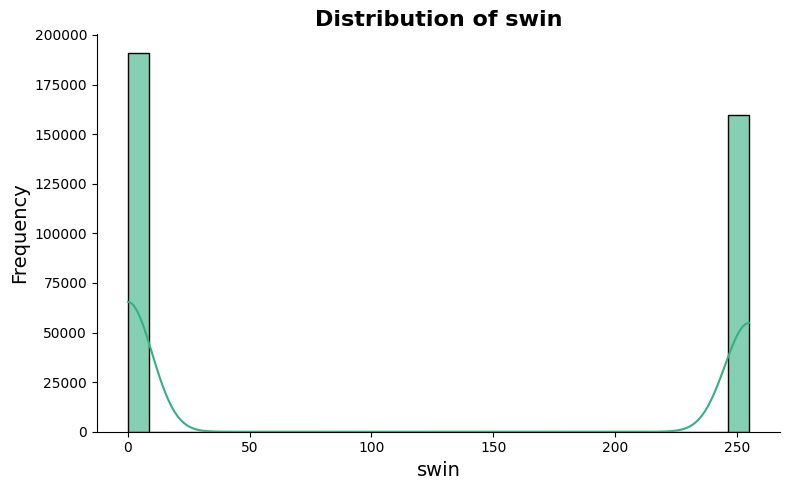

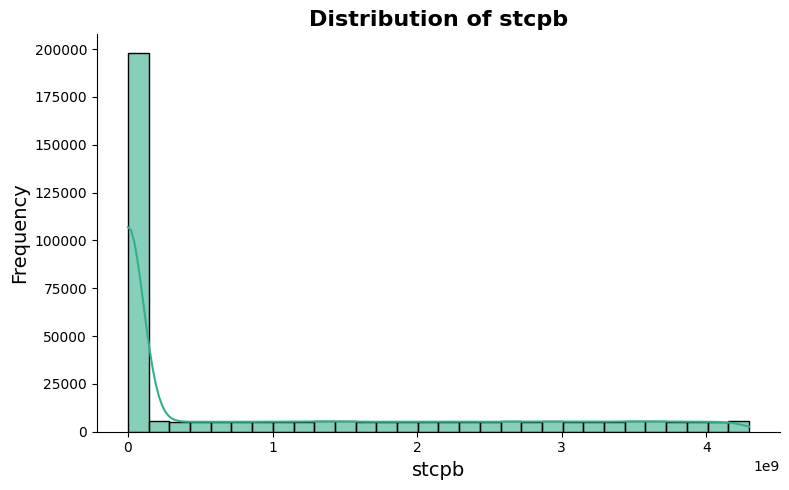

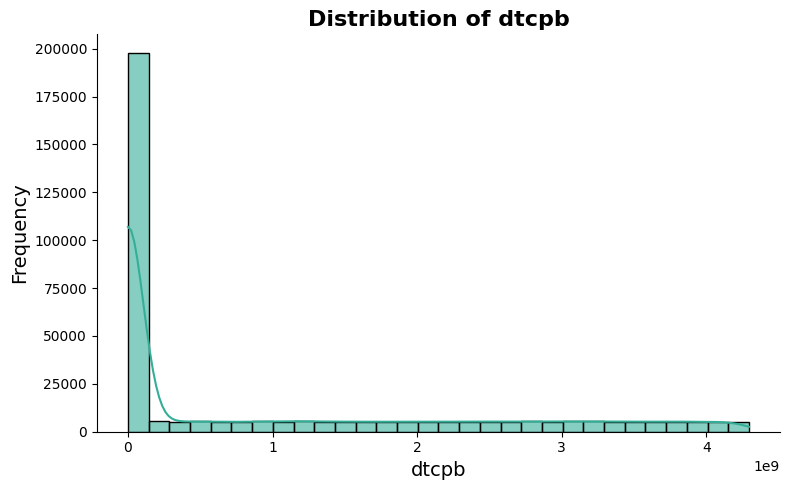

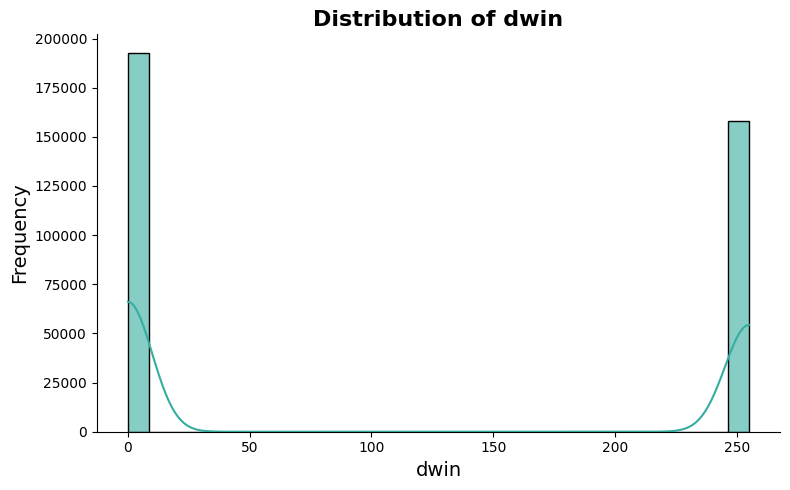

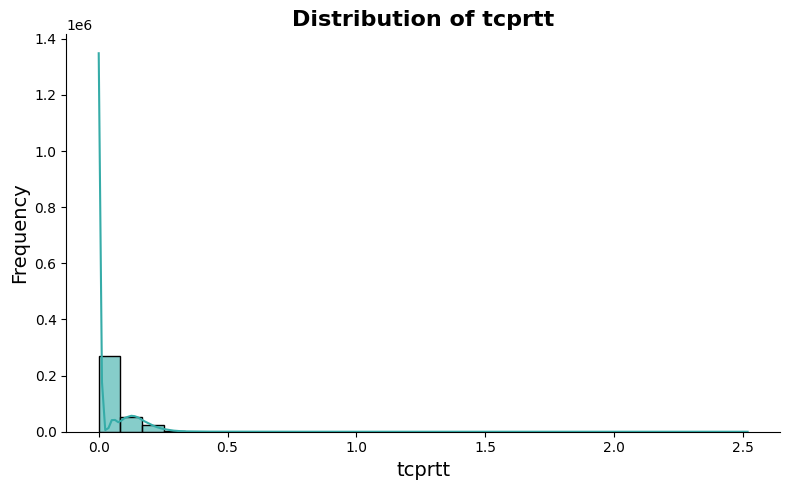

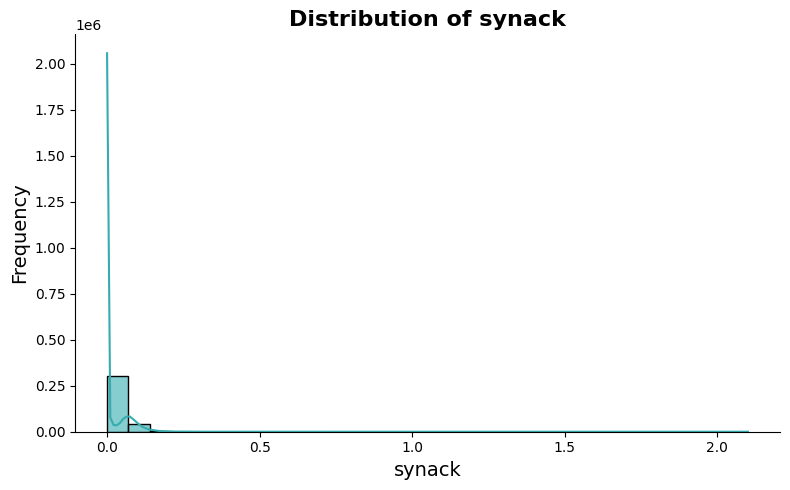

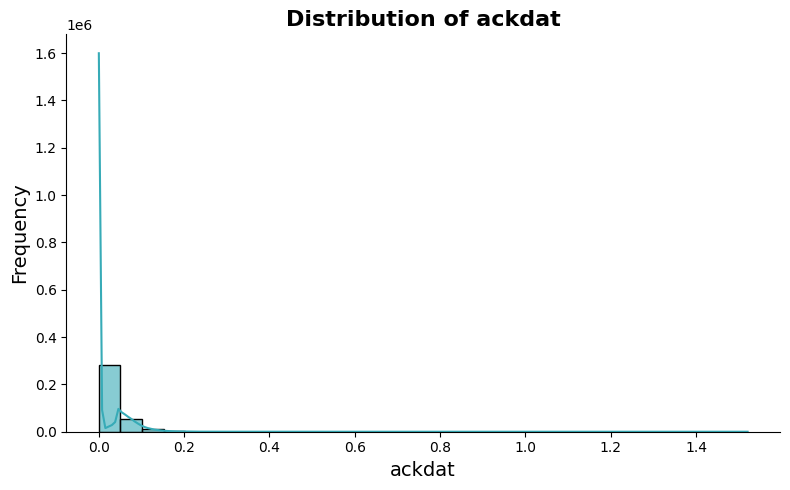

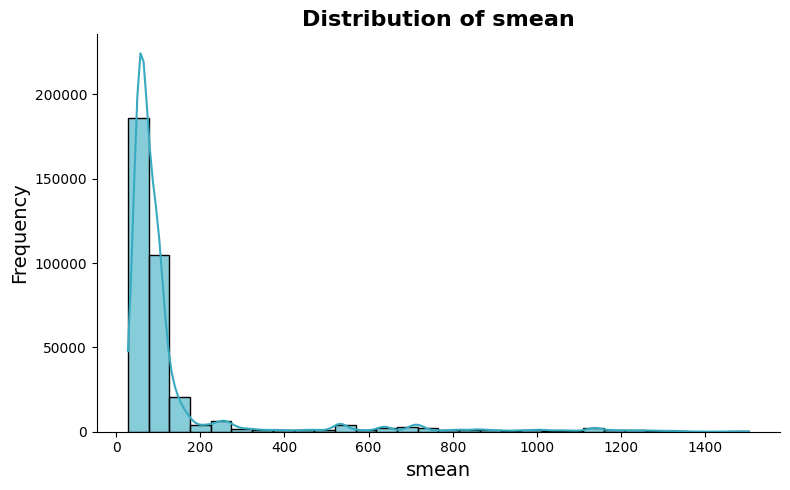

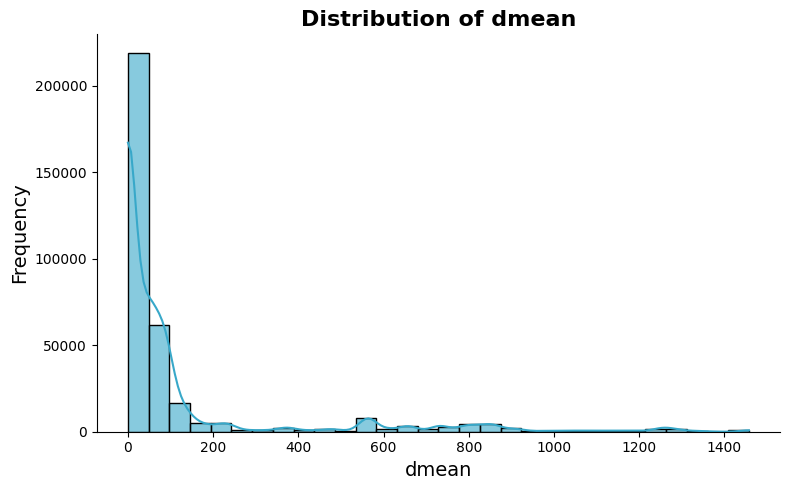

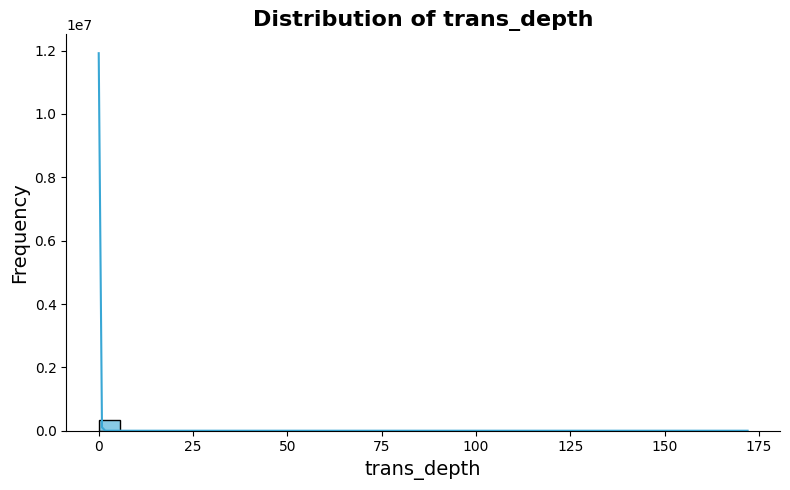

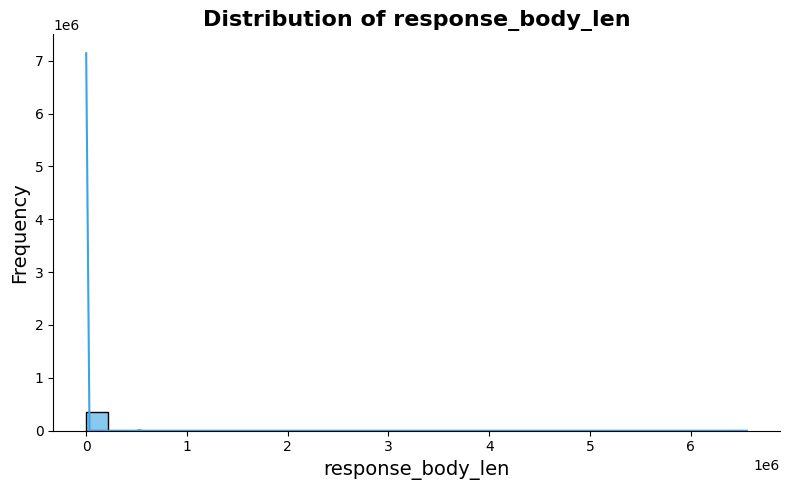

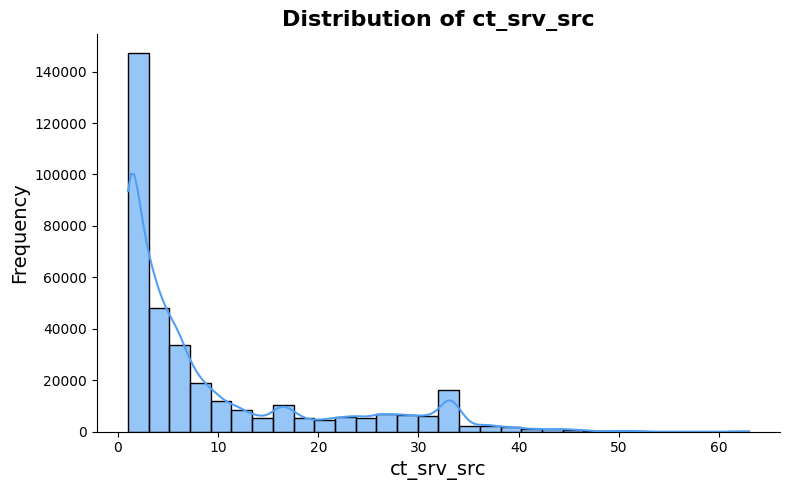

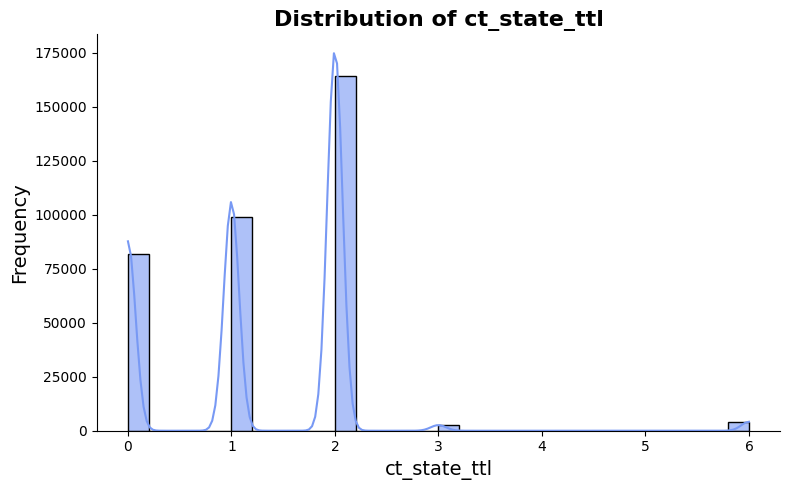

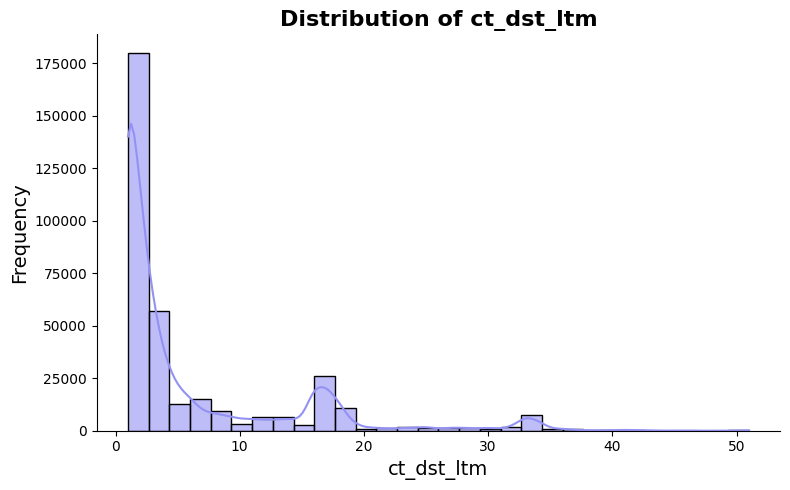

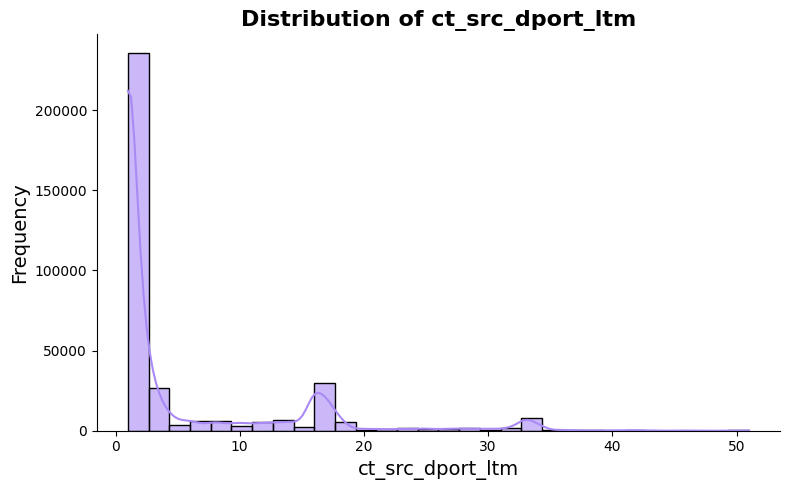

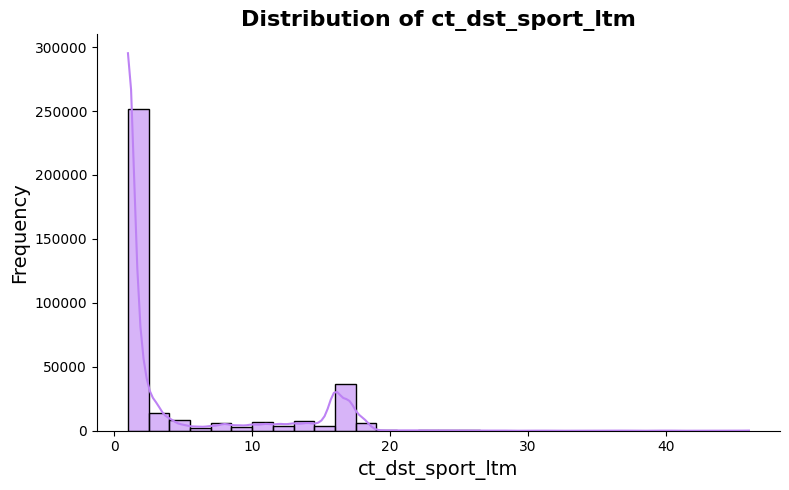

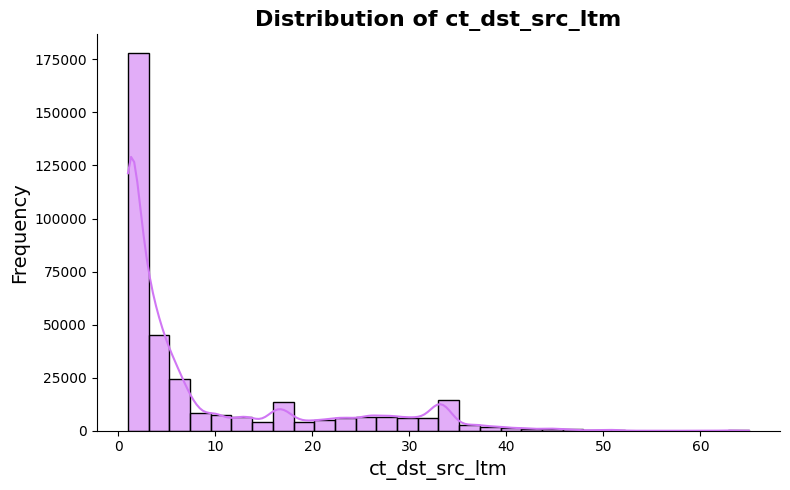

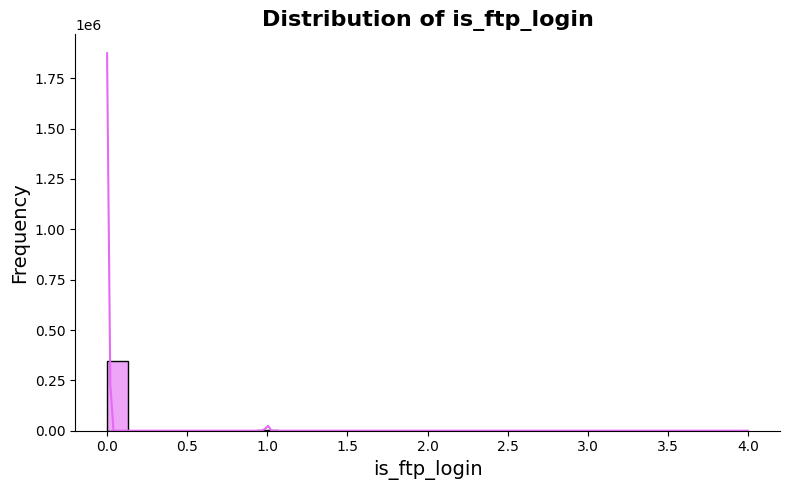

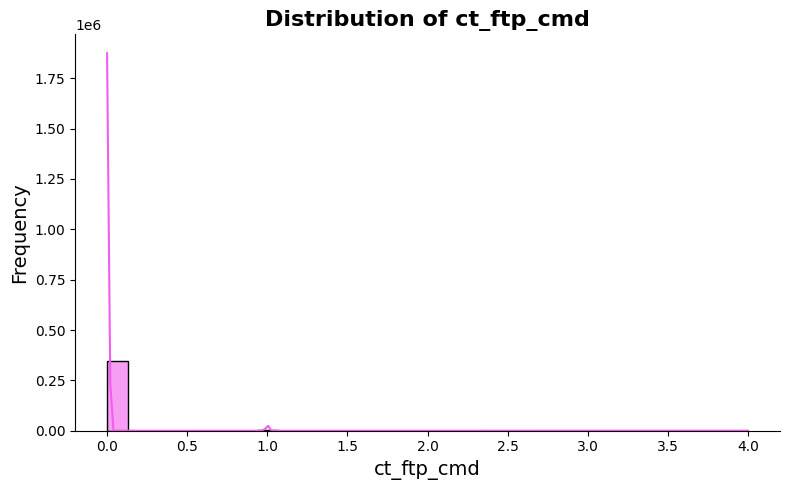

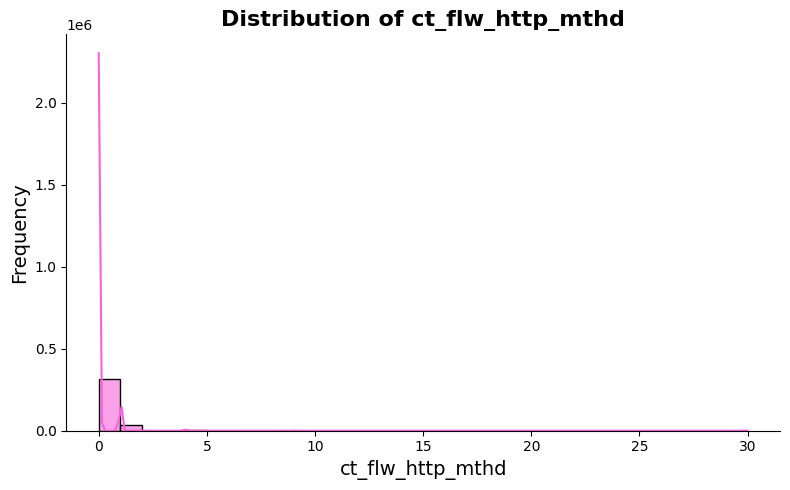

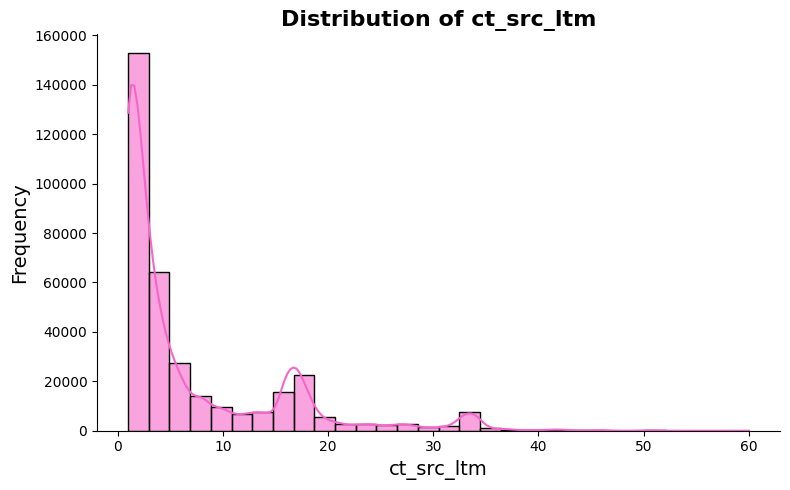

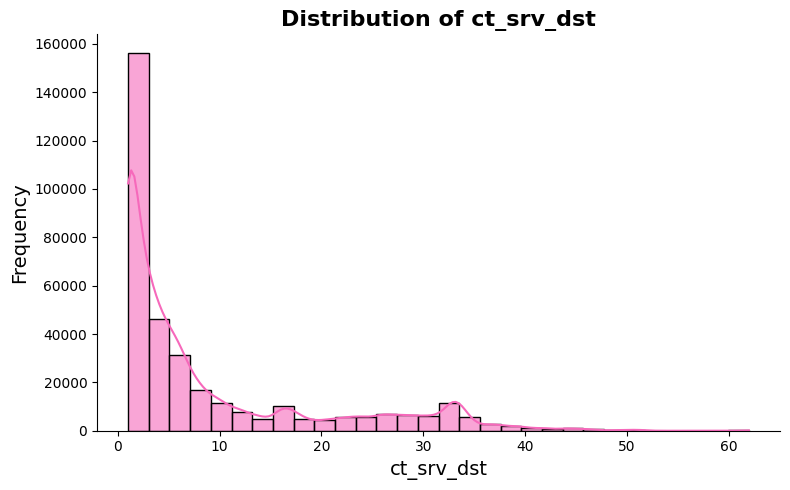

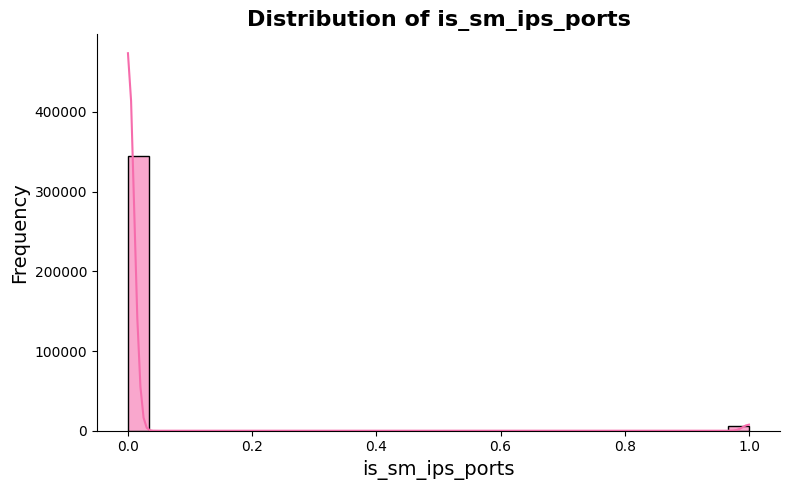

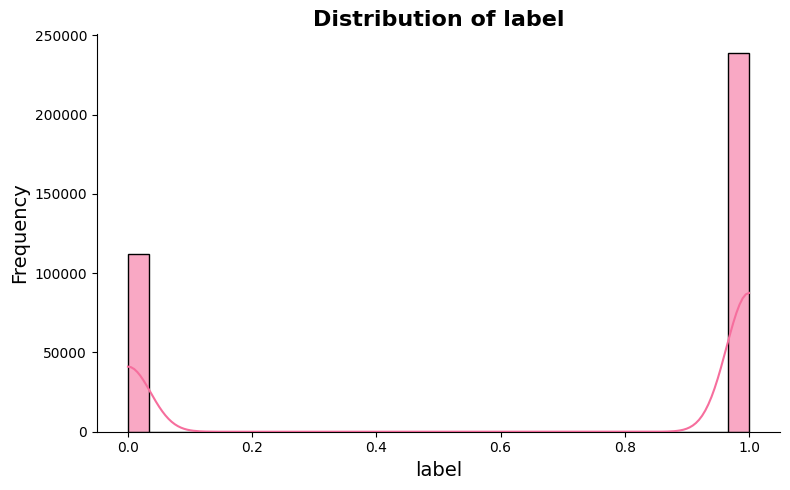

In [23]:
palette = sns.color_palette("husl", len(num_features))

for idx, i in enumerate(num_features):
    plt.figure(figsize=(8, 5))
    sns.histplot(
        df[i],
        kde=True,
        color=palette[idx],
        bins=30,
        alpha=0.6
    )

    plt.title(f"Distribution of {i}", fontsize=16, weight='bold')
    plt.xlabel(i, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.show()

In [24]:
print(df['attack_cat'].value_counts())
print(df['label'].value_counts())

attack_cat
Normal            112000
Generic            80000
Exploits           66786
Fuzzers            36368
DoS                24528
Reconnaissance     20982
Analysis            4000
Backdoor            3492
Shellcode           2266
Worms                260
Name: count, dtype: int64
label
1    238682
0    112000
Name: count, dtype: int64


In [25]:
styled_df = df.head(5).style.set_table_styles(
    [
        {'selector': 'thead th',
         'props': [('background-color', '#8e44ad'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},

        {'selector': 'th, td',
         'props': [('border', '1px solid #bdc3c7')]},
    ]
).set_caption("Top 5 Rows of Concatenated Data (Styled)")

styled_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [26]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                   id            dur          spkts          dpkts  \
count  350682.000000  350682.000000  350682.000000  350682.000000   
mean    87671.000000       1.359389      20.298664      18.969591   
std     50616.658943       6.480240     136.887402     110.258113   
min         1.000000       0.000000       1.000000       0.000000   
25%     43836.000000       0.000008       2.000000       0.000000   
50%     87671.000000       0.001582       2.000000       2.000000   
75%    131506.000000       0.668069      12.000000      10.000000   
max    175341.000000      59.999989    9616.000000   10974.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  3.506820e+05  3.506820e+05  3.506820e+05  350682.000000  350682.000000   
mean   8.844844e+03  1.492892e+04  9.540619e+04     179.546997      79.609567   
std    1.747654e+05  1.436540e+05  1.654007e+05     102.939864     110.506706   
min    2.800000e+01  0.000000e+0

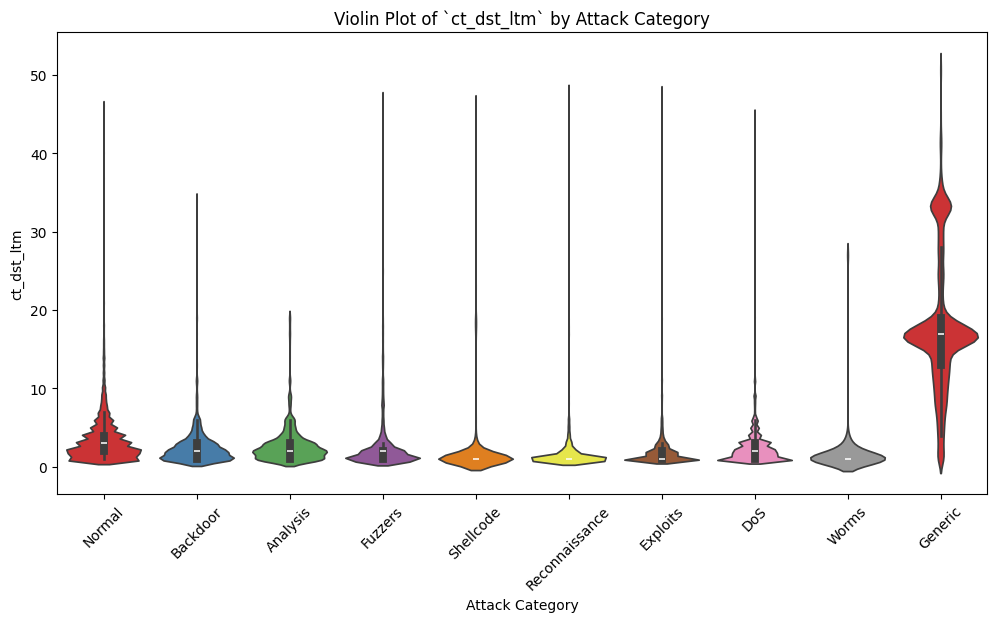

In [27]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='attack_cat', y='ct_dst_ltm', data=df, palette='Set1')
plt.title('Violin Plot of `ct_dst_ltm` by Attack Category')
plt.xlabel('Attack Category')
plt.ylabel('ct_dst_ltm')
plt.xticks(rotation=45)
plt.show()

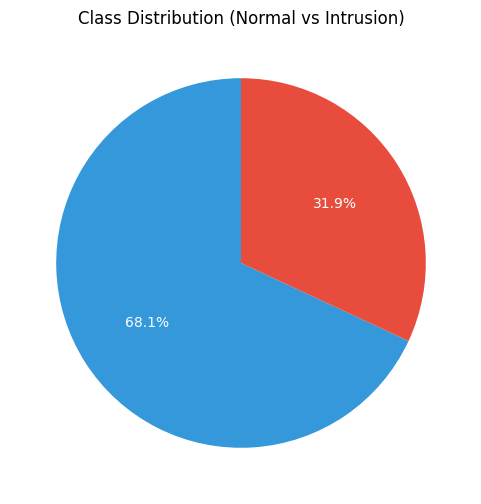

In [28]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['#3498db', '#e74c3c'], startangle=90, textprops={'color': 'white'})
plt.title('Class Distribution (Normal vs Intrusion)')
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350682 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 350682 non-null  int64  
 1   dur                350682 non-null  float64
 2   proto              350682 non-null  object 
 3   service            350682 non-null  object 
 4   state              350682 non-null  object 
 5   spkts              350682 non-null  int64  
 6   dpkts              350682 non-null  int64  
 7   sbytes             350682 non-null  int64  
 8   dbytes             350682 non-null  int64  
 9   rate               350682 non-null  float64
 10  sttl               350682 non-null  int64  
 11  dttl               350682 non-null  int64  
 12  sload              350682 non-null  float64
 13  dload              350682 non-null  float64
 14  sloss              350682 non-null  int64  
 15  dloss              350682 non-null  int64  
 16  sinpkt 

attack_cat
Generic           80000
Exploits          66786
Fuzzers           36368
DoS               24528
Reconnaissance    20982
Analysis           4000
Backdoor           3492
Shellcode          2266
Worms               260
Name: count, dtype: int64


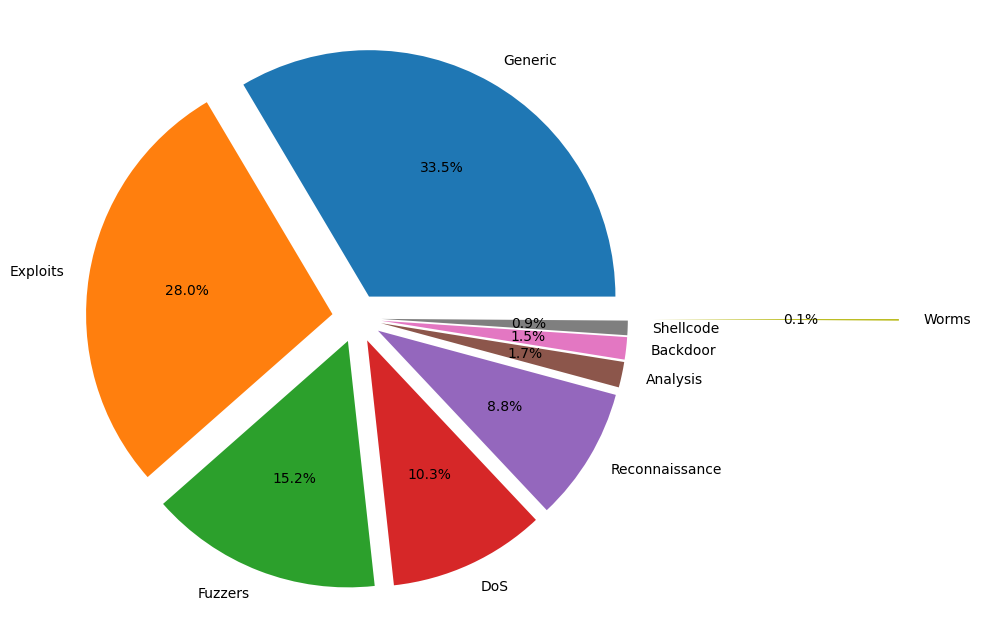

In [30]:
validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

plt.figure(figsize = (15,8))
explode = [0.1] * len(validAttacks)
explode[-1] = 1.2
plt.pie(validAttacks, labels=validAttacks.index, autopct='%1.1f%%', explode=explode)
plt.show()

In [31]:
print(df.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

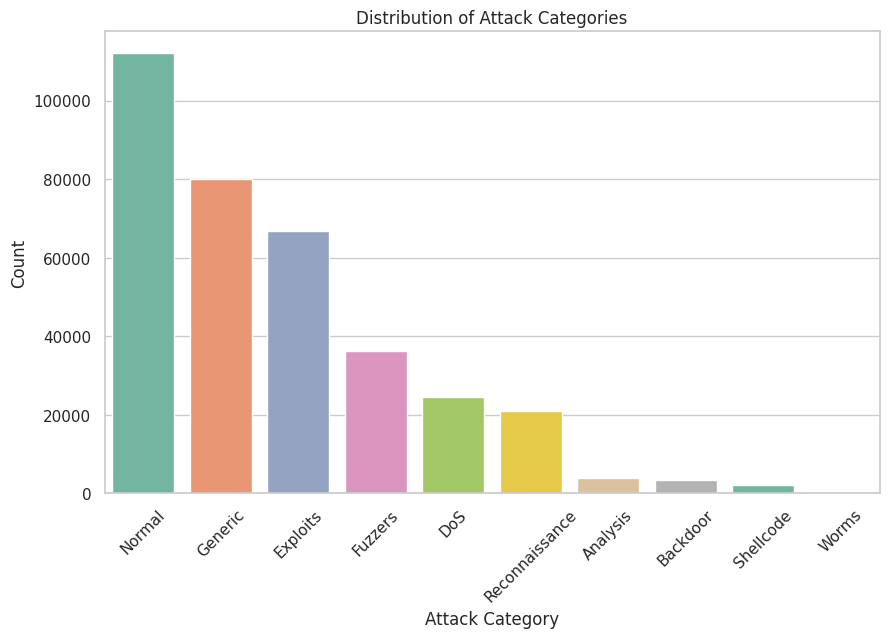

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='attack_cat', data=df, palette='Set2', order=df['attack_cat'].value_counts().index)
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [33]:
df = df.dropna()  # Drop any missing values
df = df.drop(columns=['attack_cat'])

In [34]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,350682.000000,350682.000000,350682.000000,350682.000000,3.506820e+05,3.506820e+05,3.506820e+05,350682.000000,350682.000000,3.506820e+05,...,350682.000000,350682.000000,350682.000000,350682.000000,350682.000000,350682.000000,350682.000000,350682.000000,350682.000000,350682.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.658943,6.480240,136.887402,110.258113,1.747654e+05,1.436540e+05,1.654007e+05,102.939864,110.506706,1.883572e+08,...,8.047093,5.783577,10.956170,0.126048,0.126048,0.701207,8.321481,10.756937,0.124515,0.466236
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


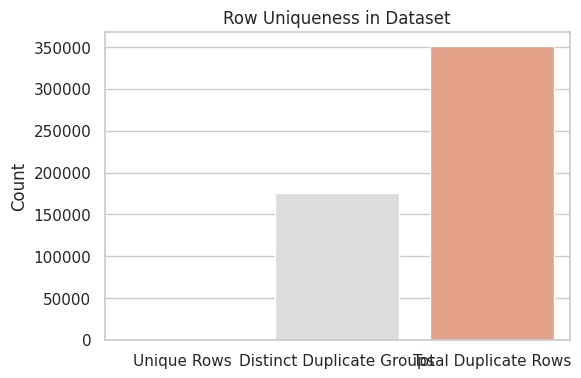

In [35]:
# Counts
row_counts = df.value_counts()
unique_rows = (row_counts == 1).sum()
duplicate_groups = (row_counts > 1).sum()
duplicate_rows_total = len(df) - unique_rows

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    x=['Unique Rows', 'Distinct Duplicate Groups', 'Total Duplicate Rows'],
    y=[unique_rows, duplicate_groups, duplicate_rows_total],
    palette='coolwarm'
)
plt.title('Row Uniqueness in Dataset')
plt.ylabel('Count')
plt.show()

In [36]:
df = df.drop_duplicates()

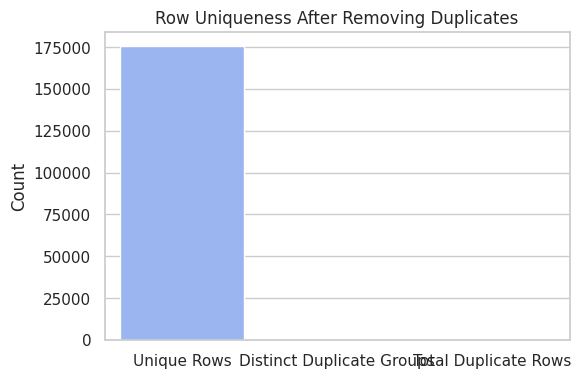

In [37]:
row_counts = df.value_counts()
unique_rows = (row_counts == 1).sum()
duplicate_groups = (row_counts > 1).sum()
duplicate_rows_total = len(df) - unique_rows

plt.figure(figsize=(6, 4))
sns.barplot(
    x=['Unique Rows', 'Distinct Duplicate Groups', 'Total Duplicate Rows'],
    y=[unique_rows, duplicate_groups, duplicate_rows_total],
    palette='coolwarm'
)
plt.title('Row Uniqueness After Removing Duplicates')
plt.ylabel('Count')
plt.show()

proto
tcp       79946
udp       63283
unas      12084
arp        2859
ospf       2595
sctp       1150
any         300
gre         225
ipv6        201
mobile      201
Name: count, dtype: int64


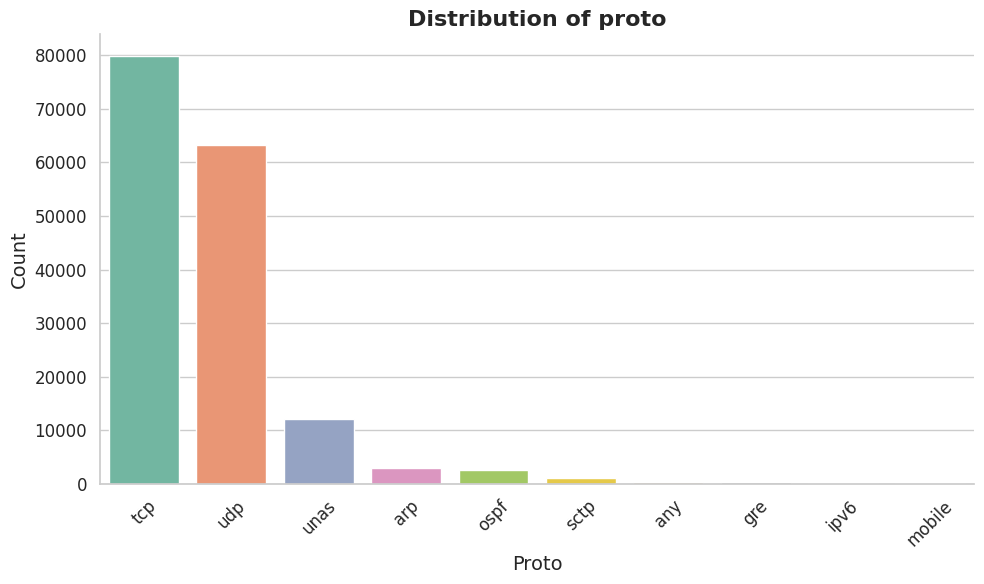

service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
Name: count, dtype: int64


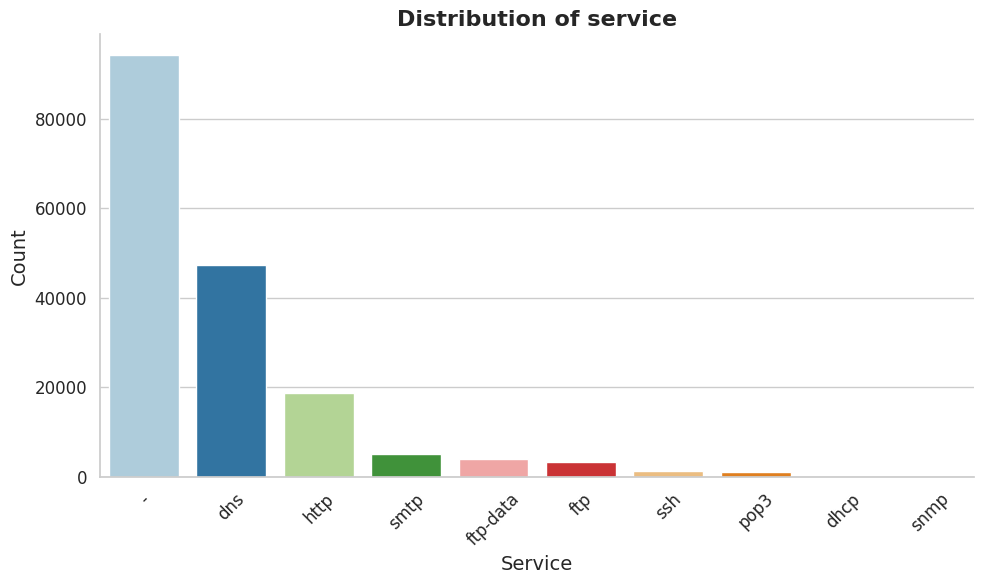

state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: count, dtype: int64


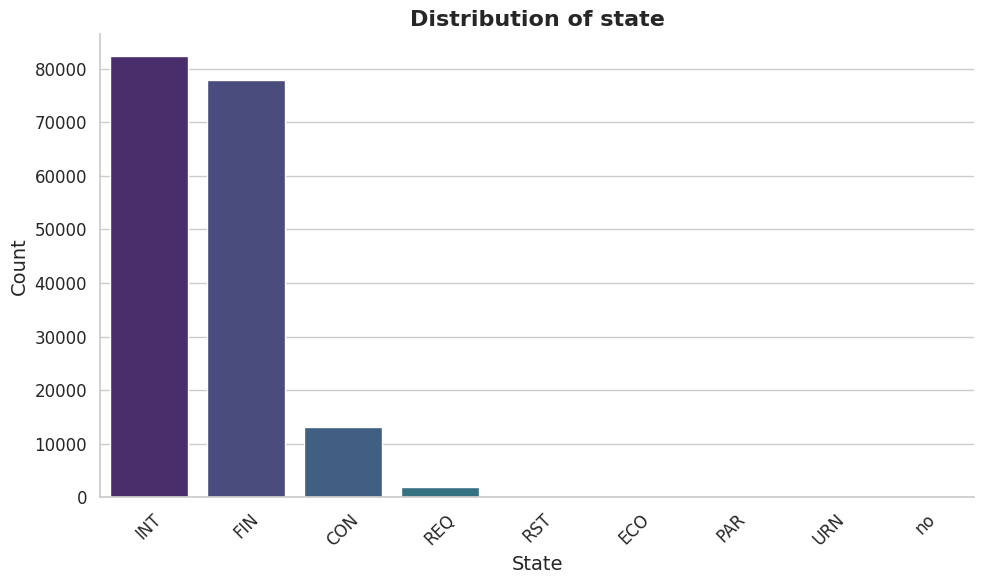

In [38]:
palettes = ["Set2", "Paired", "viridis"]

for i, col in enumerate(['proto', 'service', 'state']):

    print(df[col].value_counts().head(10))

    plt.figure(figsize=(10, 6))
    sns.countplot(
        x=col,
        data=df,
        order=df[col].value_counts().iloc[:10].index,
        palette=palettes[i % len(palettes)]
    )

    # Styling
    plt.title(f'Distribution of {col}', fontsize=16, weight='bold')
    plt.xlabel(col.capitalize(), fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()

    plt.tight_layout()
    plt.show()

In [39]:
# Data preprocessing
label_encoder = LabelEncoder()
categorical_features = [ 'proto','service', 'state']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

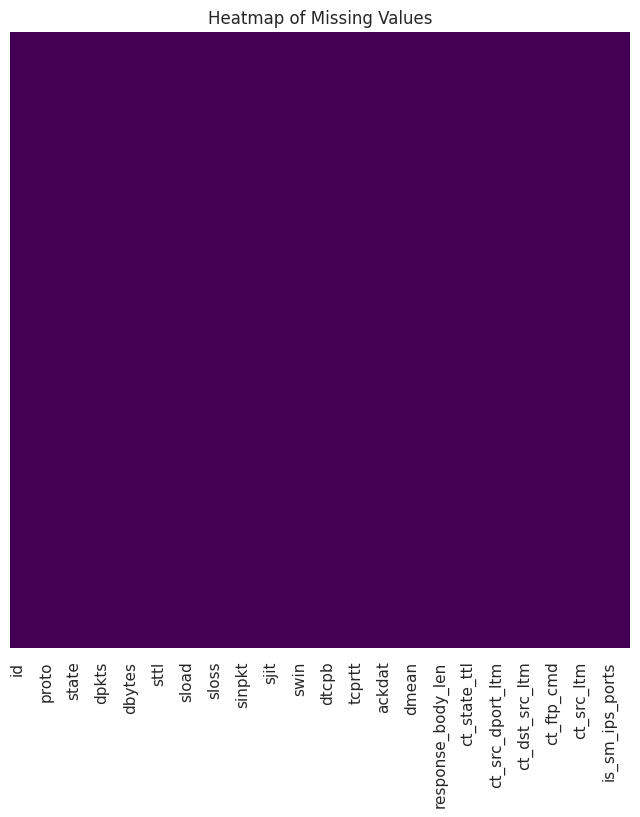

In [40]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

<Axes: title={'center': 'Correlation Plot'}>

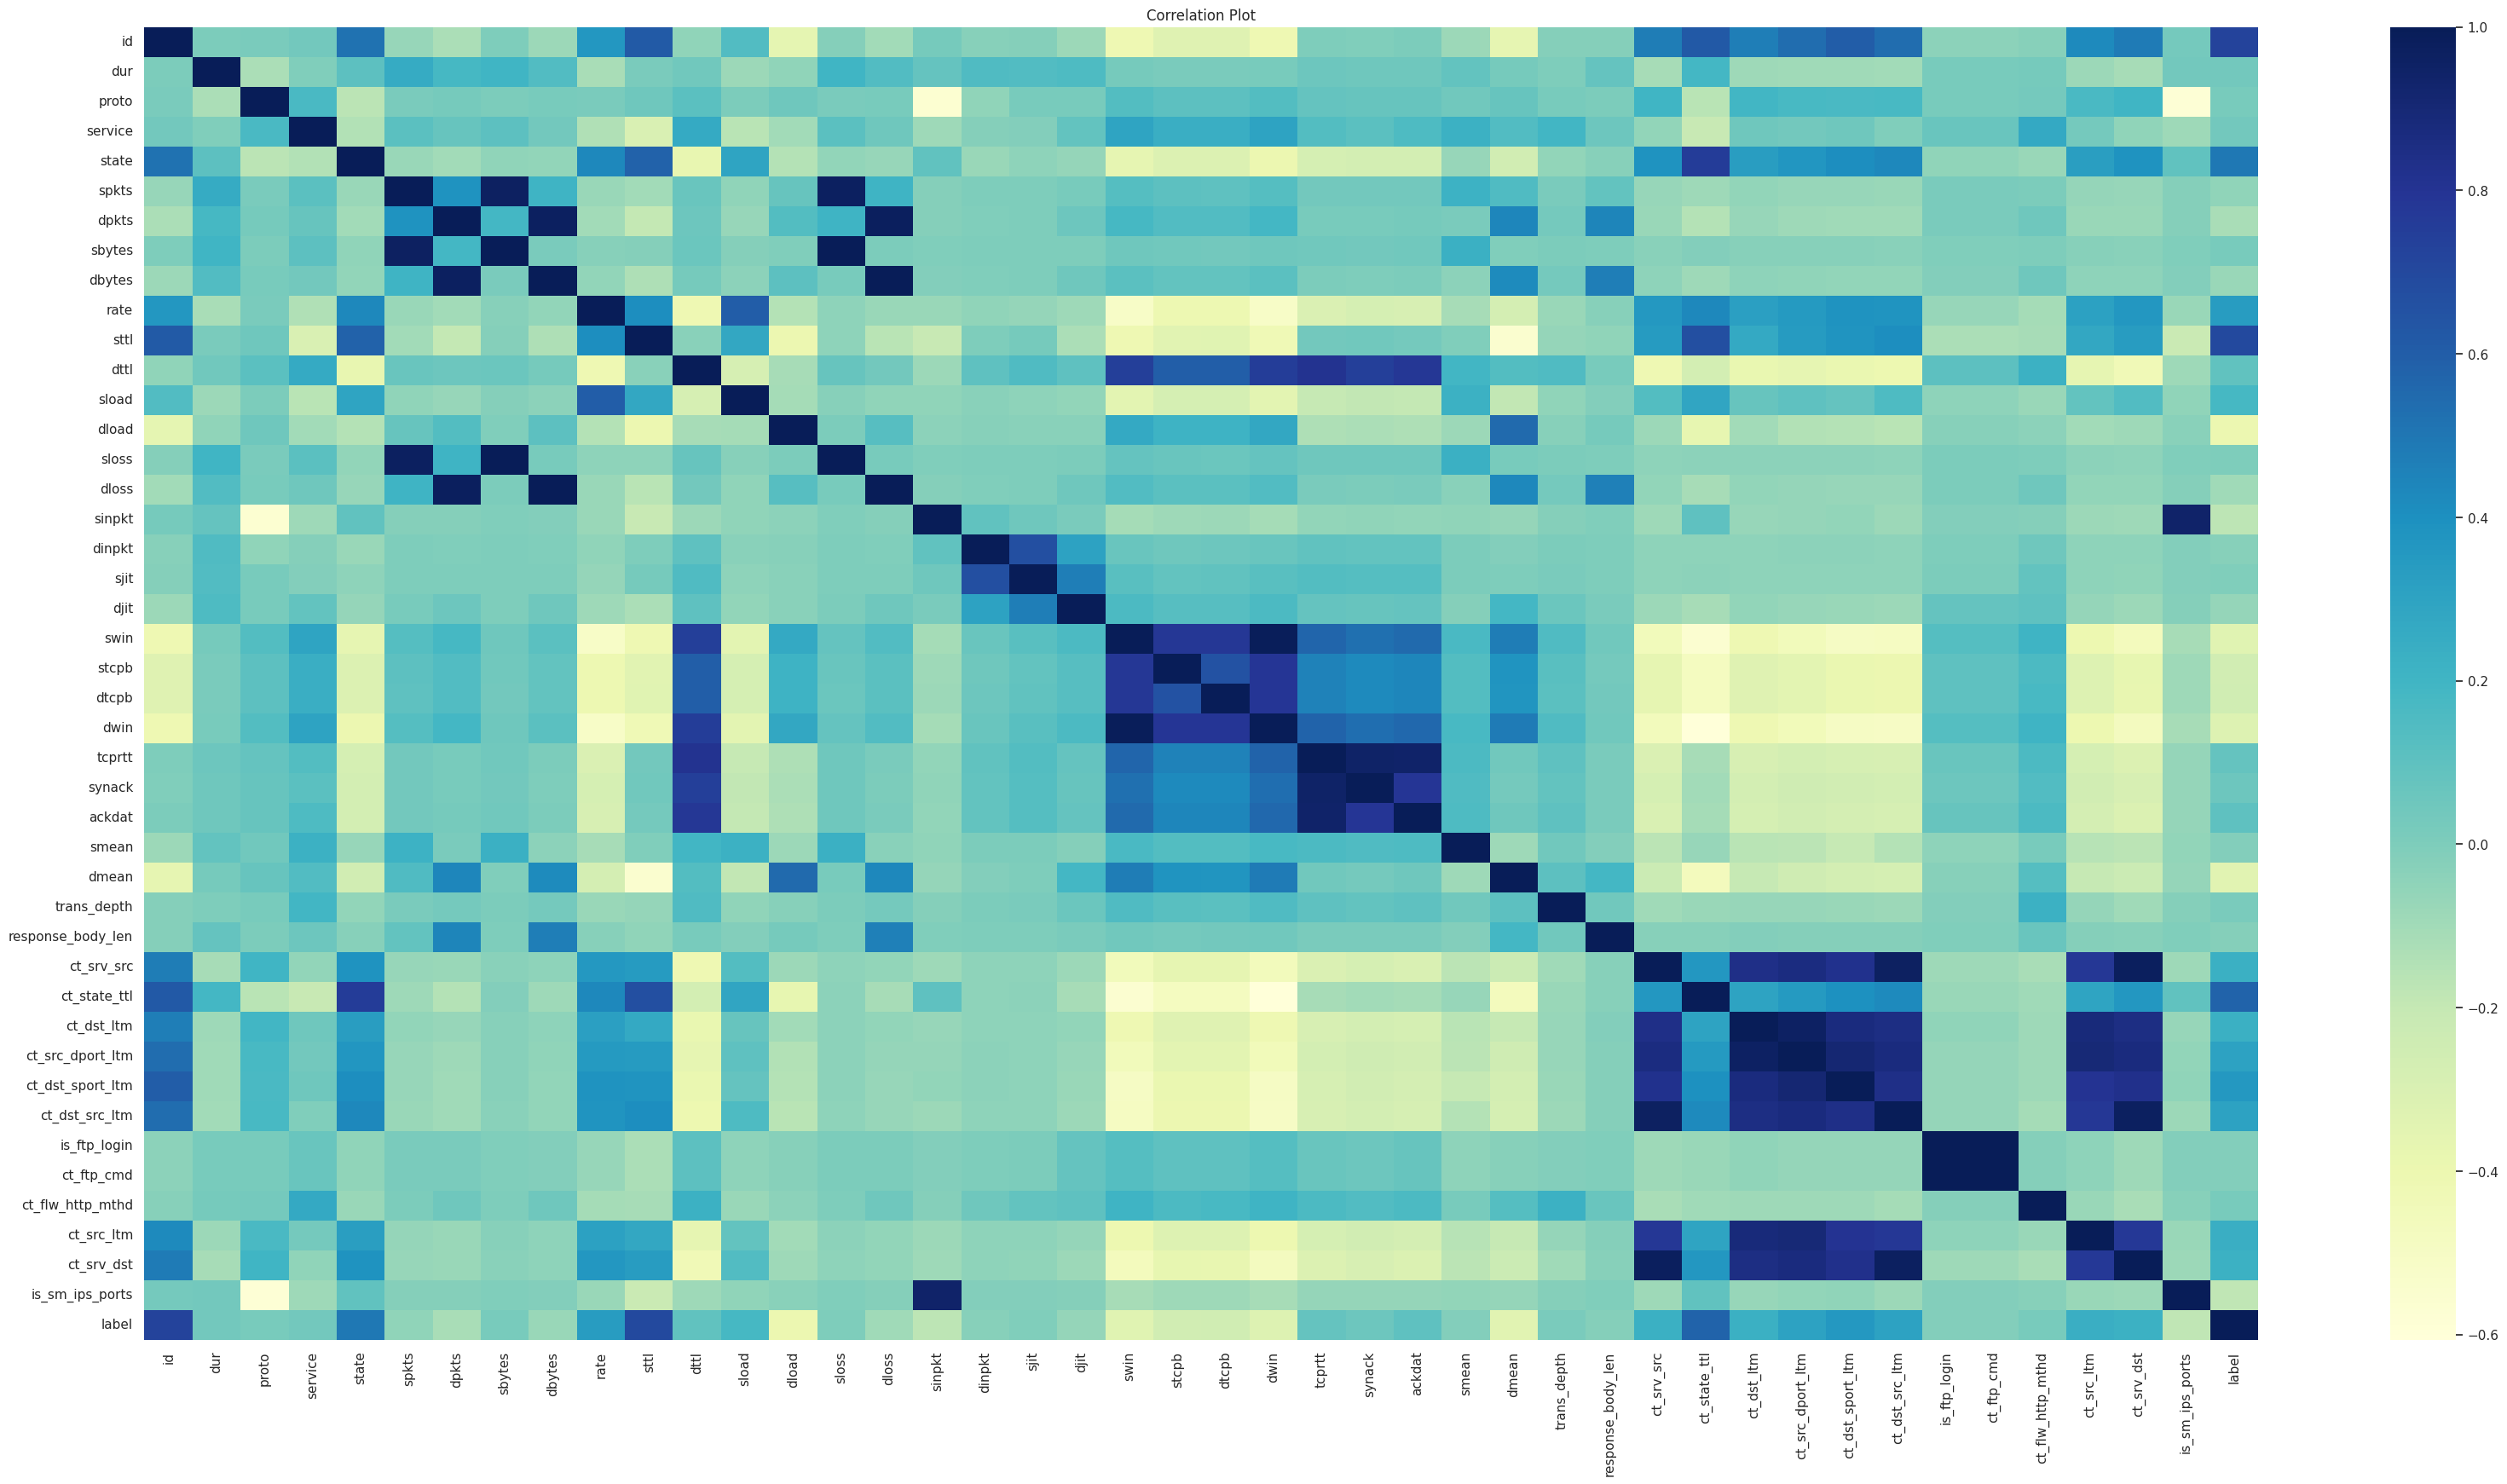

In [41]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),cmap='YlGnBu')

In [42]:
X=df.drop(['label'],axis=1)
X.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,1,1,0,0,0,1,1,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,1,1,2,0,0,0,1,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,2,1,1,3,0,0,0,2,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,2,1,1,3,1,1,0,2,1,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,2,2,1,40,0,0,0,2,39,0


In [43]:
Y=df['label']
Y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

AdaBoost Classifier:
Accuracy: 0.9689754484017223
Precision: 0.9641491006755107
Recall: 0.9913389121338912
F1 Score: 0.977554977926311

Confusion Matrix:
[[10288   881]
 [  207 23693]]


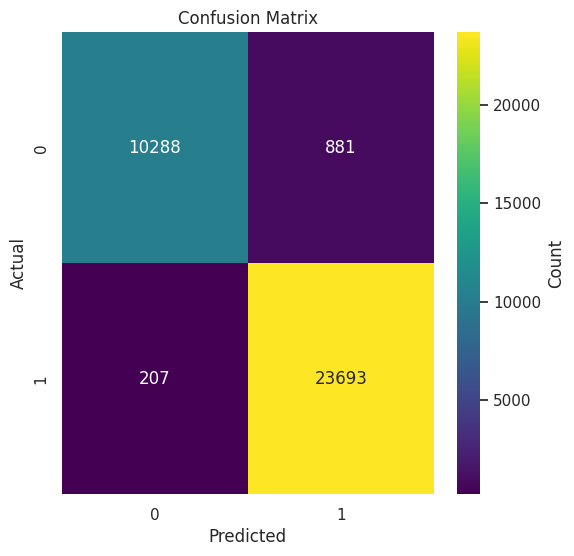


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     11169
           1       0.96      0.99      0.98     23900

    accuracy                           0.97     35069
   macro avg       0.97      0.96      0.96     35069
weighted avg       0.97      0.97      0.97     35069



In [45]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)

model.fit(X_train, Y_train)
y_pred_ada = model.predict(X_test)

ada_score = accuracy_score(Y_test, y_pred_ada)
print("AdaBoost Classifier:")
print("Accuracy:",  metrics.accuracy_score(Y_test, y_pred_ada))
print("Precision:",  metrics.precision_score(Y_test, y_pred_ada))
print("Recall:",  metrics.recall_score(Y_test, y_pred_ada))
print("F1 Score:",  metrics.f1_score(Y_test, y_pred_ada))

cm = confusion_matrix(Y_test, y_pred_ada)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='viridis',
    cbar_kws={'label': 'Count'}
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_ada))

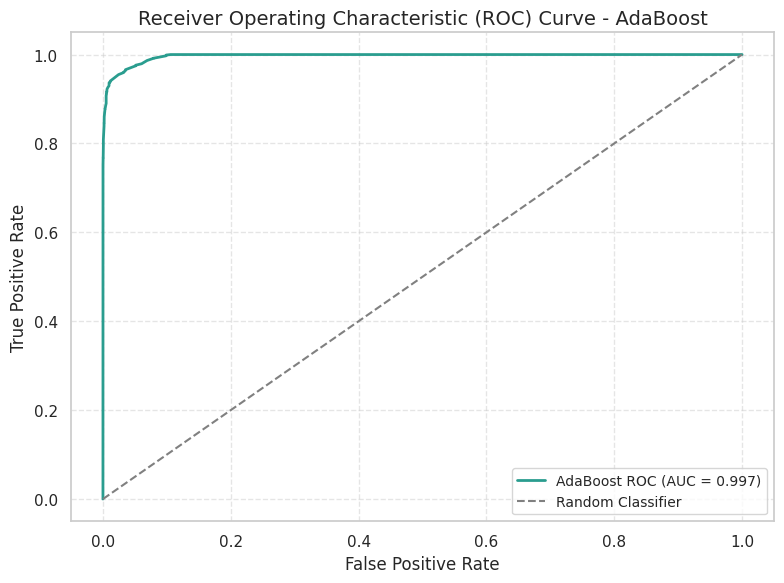

In [46]:
y_probs_ada = model.predict_proba(X_test)[:, 1]
fpr_ada, tpr_ada, thresholds_ada = roc_curve(Y_test, y_probs_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='#2a9d8f', label=f'AdaBoost ROC (AUC = {roc_auc_ada:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier', linewidth=1.5)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

LogisticRegression:
Accuracy: 0.8876785765205737
Precision: 0.8699358760517439
Recall: 0.9820083682008368
F1 Score: 0.9225810255704712

Confusion Matrix:
[[ 7660  3509]
 [  430 23470]]


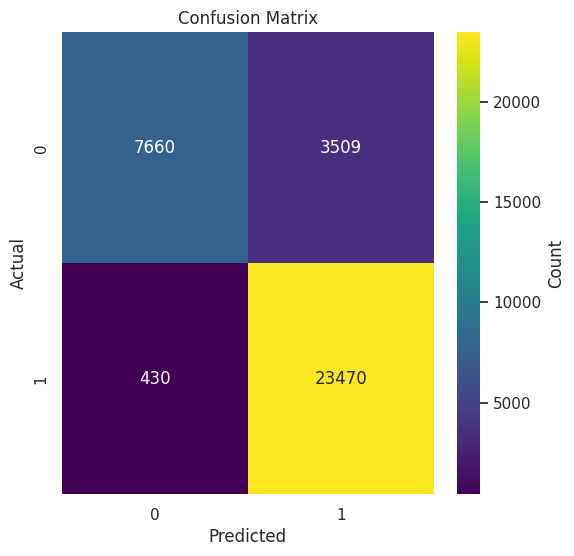


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     11169
           1       0.87      0.98      0.92     23900

    accuracy                           0.89     35069
   macro avg       0.91      0.83      0.86     35069
weighted avg       0.89      0.89      0.88     35069



In [47]:
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)
y_pred_LG1 = model.predict(X_test)

Log_score = accuracy_score(Y_test, y_pred_LG1)
print("LogisticRegression:")
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred_LG1))
print("Precision:", metrics.precision_score(Y_test, y_pred_LG1))
print("Recall:", metrics.recall_score(Y_test, y_pred_LG1))
print("F1 Score:", metrics.f1_score(Y_test, y_pred_LG1))

cm = confusion_matrix(Y_test, y_pred_LG1)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='viridis',
    cbar_kws={'label': 'Count'}
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_LG1))

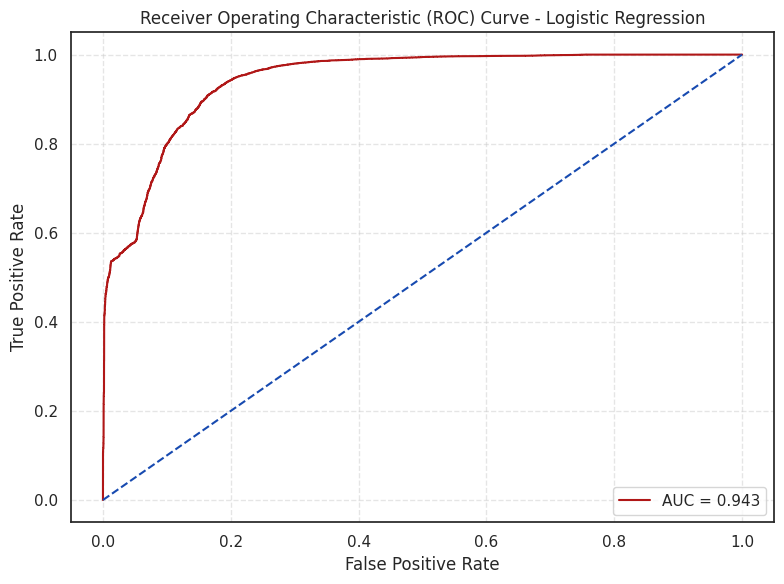

In [48]:
predicted_probab_log = model.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predicted_probab_log)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Gaussian Naive Bayes Classifier:
Accuracy: 0.8506373150075566
Precision: 0.8828259620907525
Recall: 0.9003347280334728
F1 Score: 0.8914943862120396

Confusion Matrix:
[[ 8313  2856]
 [ 2382 21518]]


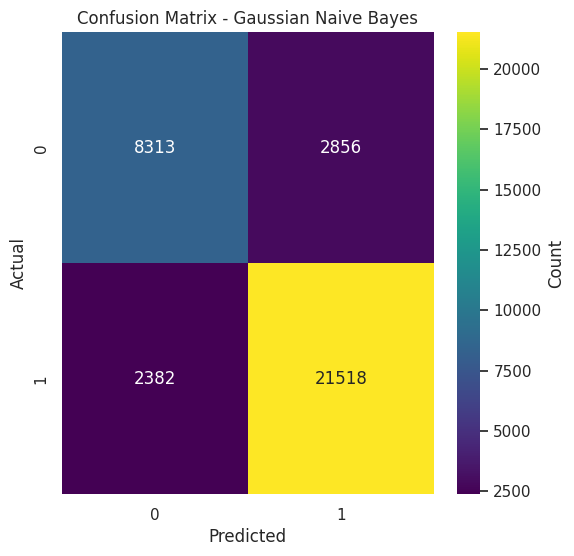


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76     11169
           1       0.88      0.90      0.89     23900

    accuracy                           0.85     35069
   macro avg       0.83      0.82      0.83     35069
weighted avg       0.85      0.85      0.85     35069



In [49]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
y_pred_gnb = gnb_model.predict(X_test)

print("Gaussian Naive Bayes Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred_gnb))
print("Precision:", metrics.precision_score(Y_test, y_pred_gnb))
print("Recall:", metrics.recall_score(Y_test, y_pred_gnb))
print("F1 Score:", metrics.f1_score(Y_test, y_pred_gnb))

cm = confusion_matrix(Y_test, y_pred_gnb)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='viridis',
    cbar_kws={'label': 'Count'}
)
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_gnb))

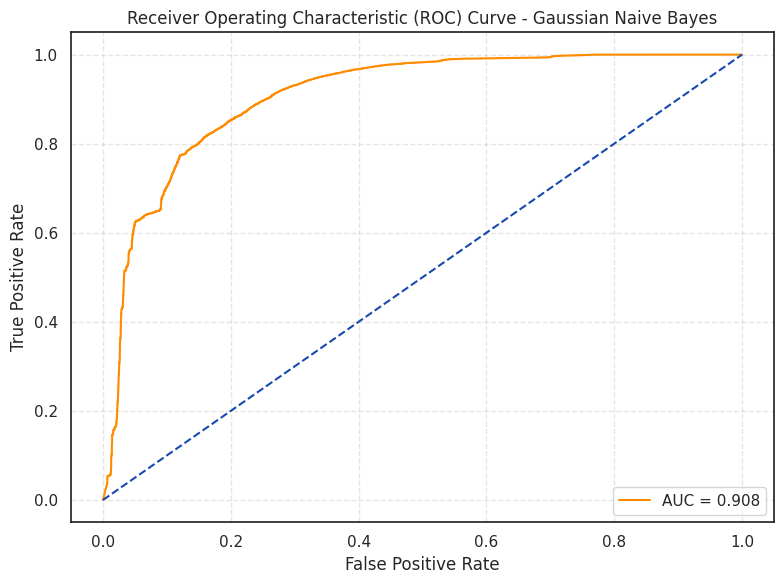

In [50]:
predicted_probab_gnb = gnb_model.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predicted_probab_gnb)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='#ff8c00', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')  # Random classifier line
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gaussian Naive Bayes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

RandomForestClassifier:
Accuracy: 0.9890501582594314
Precision: 0.9862294268464147
Recall: 0.9978661087866109
F1 Score: 0.9920136433592612

Confusion Matrix:
[[10836   333]
 [   51 23849]]


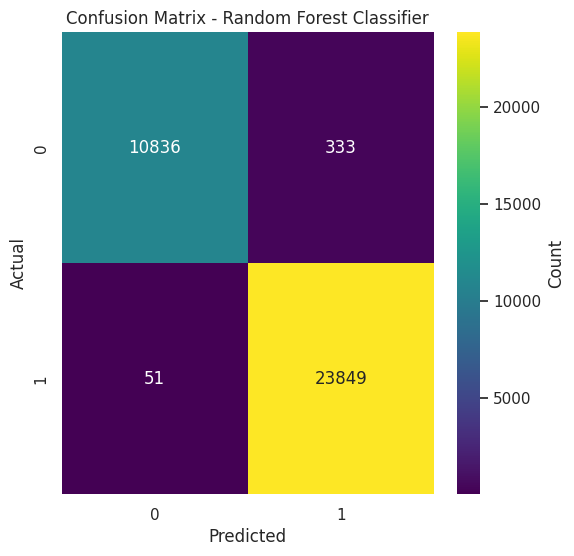


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     11169
           1       0.99      1.00      0.99     23900

    accuracy                           0.99     35069
   macro avg       0.99      0.98      0.99     35069
weighted avg       0.99      0.99      0.99     35069



In [51]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
y_pred_RF1 = model.predict(X_test)

print("RandomForestClassifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred_RF1))
print("Precision:", metrics.precision_score(Y_test, y_pred_RF1))
print("Recall:", metrics.recall_score(Y_test, y_pred_RF1))
print("F1 Score:", metrics.f1_score(Y_test, y_pred_RF1))

cm = confusion_matrix(Y_test, y_pred_RF1)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='viridis',
    cbar_kws={'label': 'Count'}
)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_RF1))

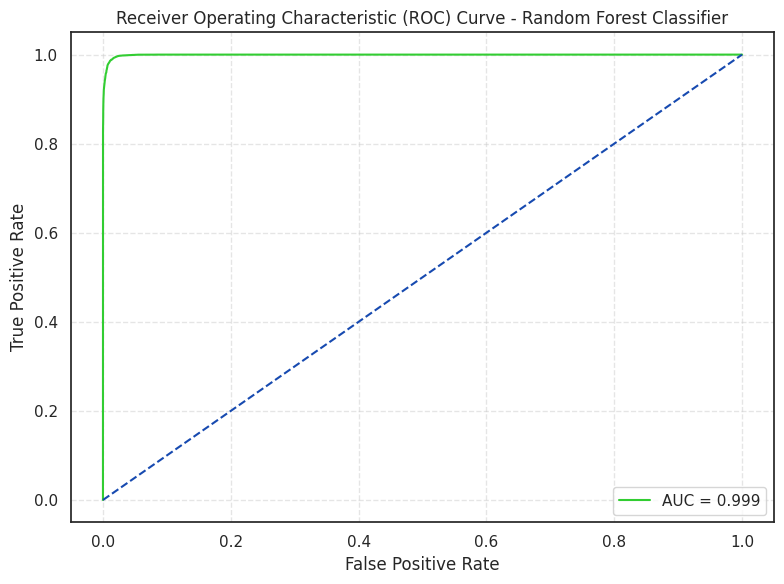

In [52]:
predicted_probab_RF = model.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predicted_probab_RF)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='#32CD32', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')  # Random classifier line
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest Classifier')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

KNeighborsClassifier:
Accuracy: 0.8991987225184636
Precision: 0.9058551556459006
Recall: 0.9509205020920503
F1 Score: 0.927840943885362

Confusion Matrix:
[[ 8807  2362]
 [ 1173 22727]]


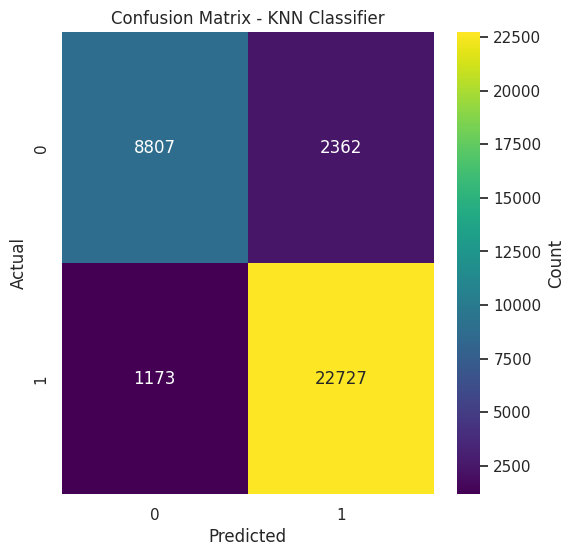


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83     11169
           1       0.91      0.95      0.93     23900

    accuracy                           0.90     35069
   macro avg       0.89      0.87      0.88     35069
weighted avg       0.90      0.90      0.90     35069



In [53]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
y_pred_KNN = model.predict(X_test)

print("KNeighborsClassifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred_KNN))
print("Precision:", metrics.precision_score(Y_test, y_pred_KNN))
print("Recall:", metrics.recall_score(Y_test, y_pred_KNN))
print("F1 Score:", metrics.f1_score(Y_test, y_pred_KNN))

cm = confusion_matrix(Y_test, y_pred_KNN)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='viridis',
    cbar_kws={'label': 'Count'}
)
plt.title("Confusion Matrix - KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_KNN))

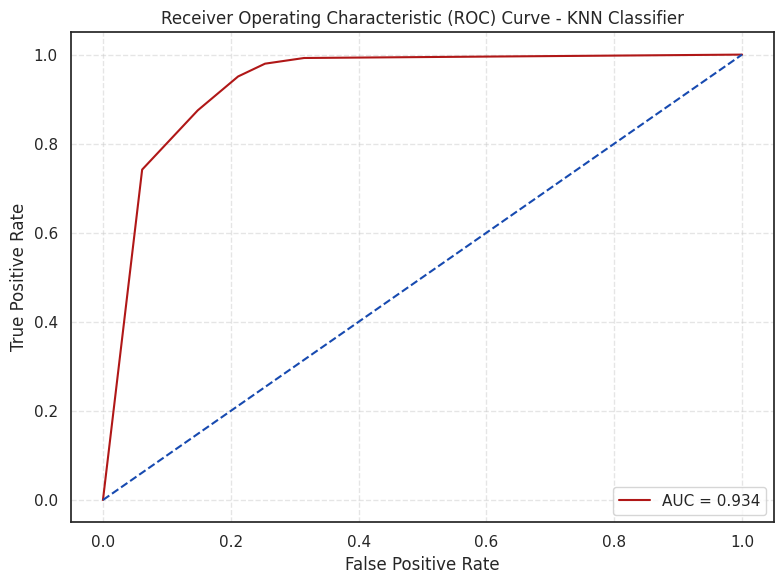

In [54]:
predicted_probab_KNN = model.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predicted_probab_KNN)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')  # Random classifier line
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN Classifier')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

MLP Classifier:
Accuracy: 0.90741110382389
Precision: 0.8939457521077327
Recall: 0.9804602510460251
F1 Score: 0.9352064334603796

Confusion Matrix:
[[ 8389  2780]
 [  467 23433]]


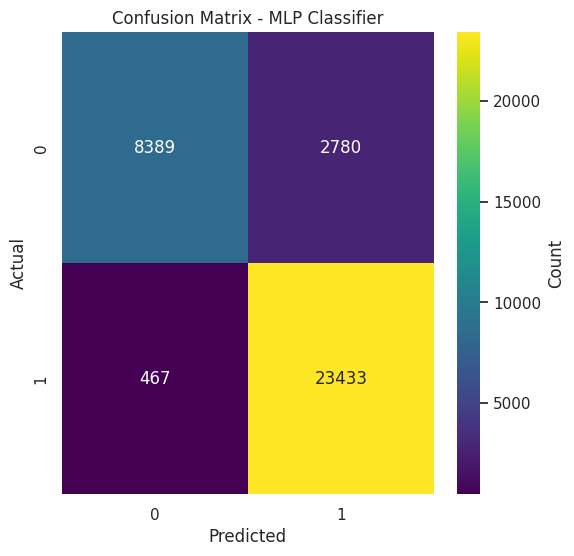


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     11169
           1       0.89      0.98      0.94     23900

    accuracy                           0.91     35069
   macro avg       0.92      0.87      0.89     35069
weighted avg       0.91      0.91      0.90     35069



In [55]:
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, Y_train)
y_pred_mlp = mlp_model.predict(X_test)

print("MLP Classifier:")
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred_mlp))
print("Precision:", metrics.precision_score(Y_test, y_pred_mlp))
print("Recall:", metrics.recall_score(Y_test, y_pred_mlp))
print("F1 Score:", metrics.f1_score(Y_test, y_pred_mlp))

cm = confusion_matrix(Y_test, y_pred_mlp)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='viridis',
    cbar_kws={'label': 'Count'}
)
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_mlp))

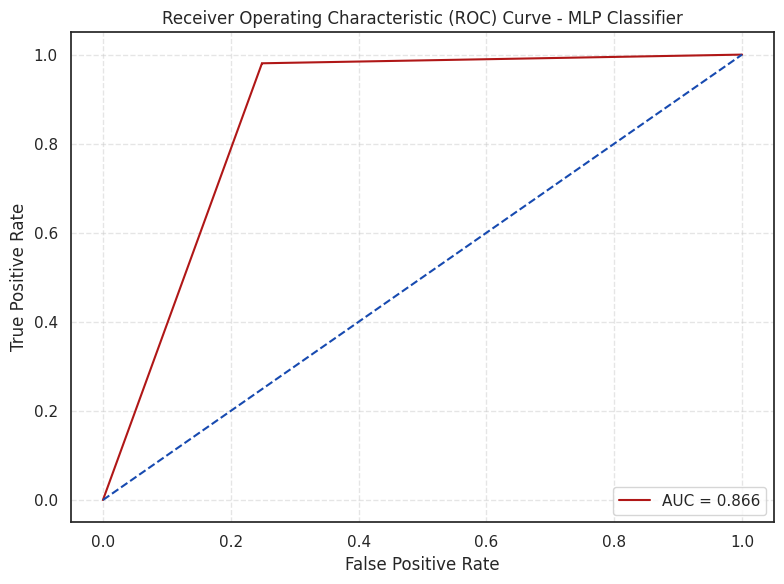

In [56]:
predicted_probab_mlp = mlp_model.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predicted_probab_mlp)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')  # Random classifier line
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - MLP Classifier')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

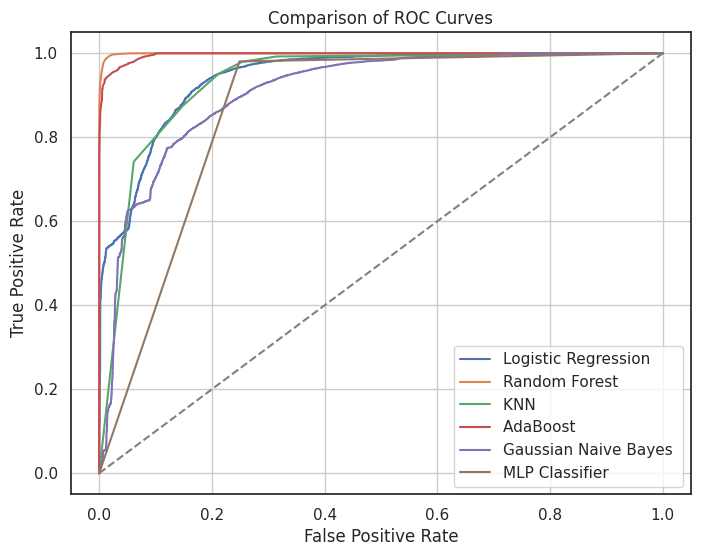

In [57]:
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("MLP Classifier", MLPClassifier(random_state=42))
]

plt.figure(figsize=(8, 6))

results = []

for model_name, model in models:
    model.fit(X_train, Y_train)

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} ')

    # Evaluate the model's performance
    y_pred = model.predict(X_test)
    accuracy = np.round(metrics.accuracy_score(Y_test, y_pred), 4)
    precision = np.round(metrics.precision_score(Y_test, y_pred), 4)
    recall = np.round(metrics.recall_score(Y_test, y_pred), 4)
    f1 = np.round(metrics.f1_score(Y_test, y_pred), 4)

    results.append([model_name, accuracy, precision, recall, f1, auc_score])

# Finalize ROC plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
df_results = df_results.sort_values(by='AUC', ascending=False).reset_index(drop=True)

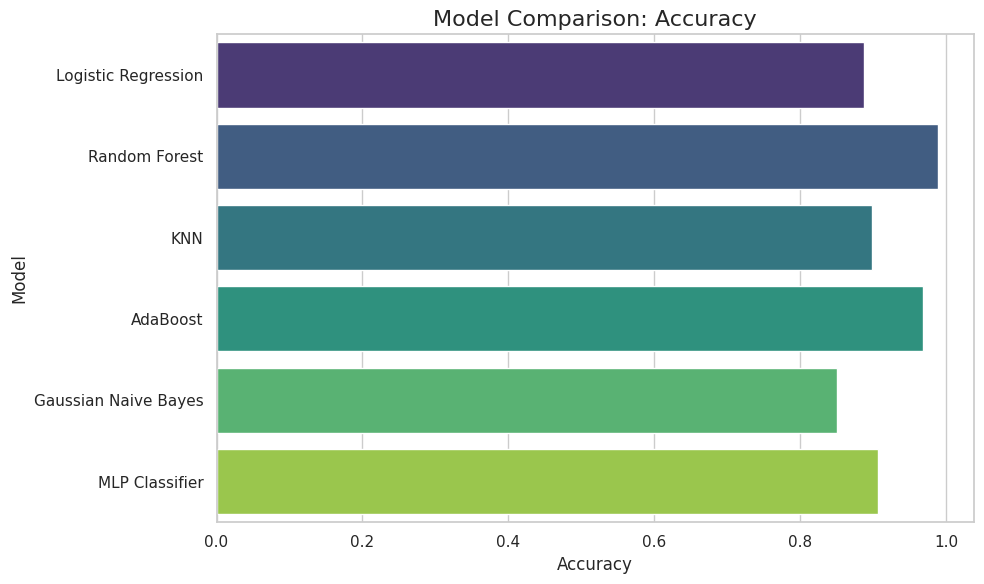

In [58]:
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Accuracy', y='Model', data=df_results, palette='viridis')

plt.title('Model Comparison: Accuracy', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.tight_layout()
plt.show()

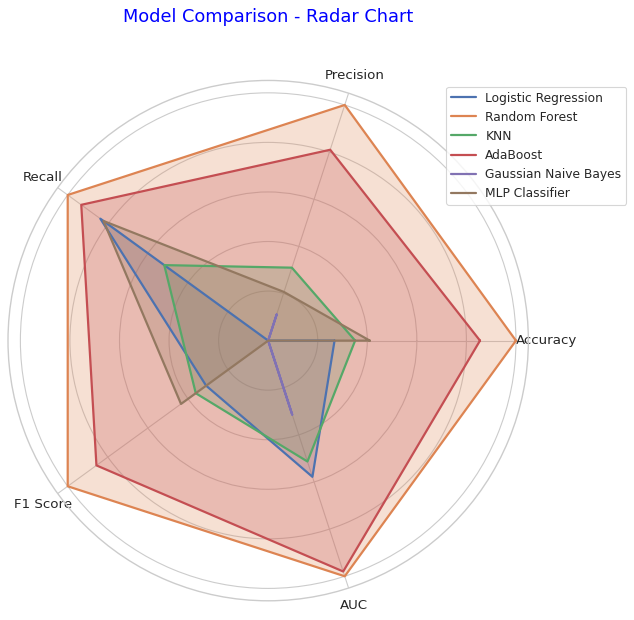

In [59]:
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

df_results_normalized = df_results[metrics].apply(lambda x: (x - min(x)) / (max(x) - min(x)))
categories = metrics
N = len(categories)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), dpi=80, subplot_kw=dict(polar=True))

for i, row in df_results_normalized.iterrows():
    values = row[metrics].tolist()
    values += values[:1]

    model_name = df_results.loc[i, 'Model']
    ax.plot(angles, values, label=model_name, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

plt.title("Model Comparison - Radar Chart", size=16, color='blue', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

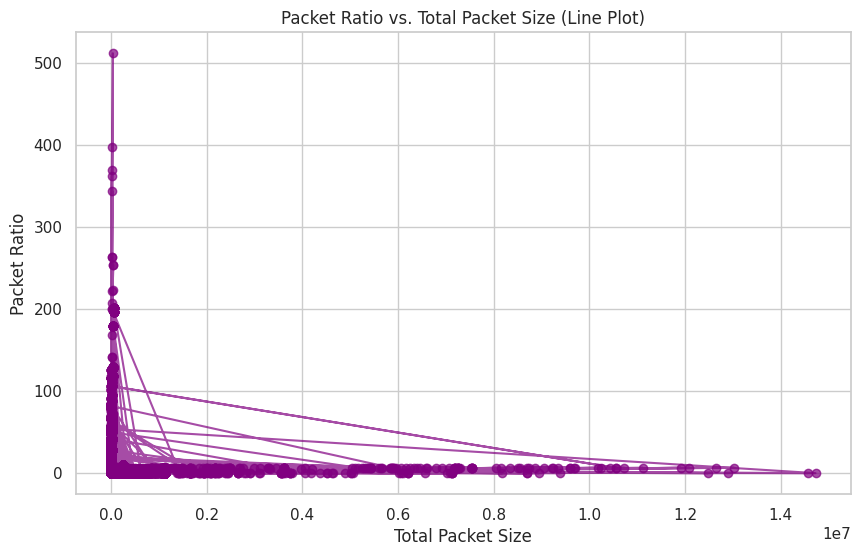

In [60]:
df['total_packet_size'] = df['sbytes'] + df['dbytes']
df['packet_ratio'] = df['spkts'] / (df['dpkts'] + 1)

plt.figure(figsize=(10, 6))
plt.plot(df['total_packet_size'], df['packet_ratio'], color='purple', marker='o', linestyle='-', alpha=0.7)
plt.title('Packet Ratio vs. Total Packet Size (Line Plot)')
plt.xlabel('Total Packet Size')
plt.ylabel('Packet Ratio')
plt.show()

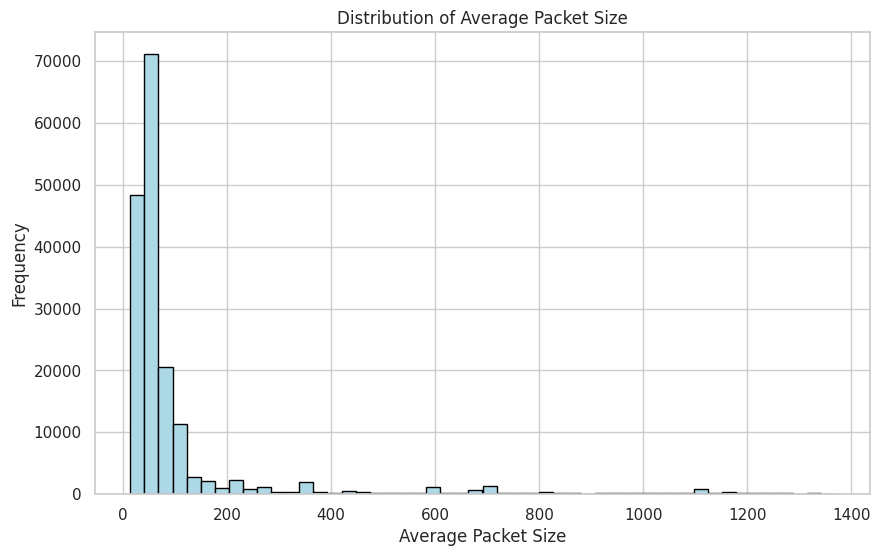

In [61]:
df['avg_packet_size'] = df['sbytes'] / (df['spkts'] + 1)
df['flow_size'] = (df['sbytes'] + df['dbytes']) / (df['spkts'] + df['dpkts'] + 1)

plt.figure(figsize=(10, 6))
plt.hist(df['avg_packet_size'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribution of Average Packet Size')
plt.xlabel('Average Packet Size')
plt.ylabel('Frequency')
plt.show()

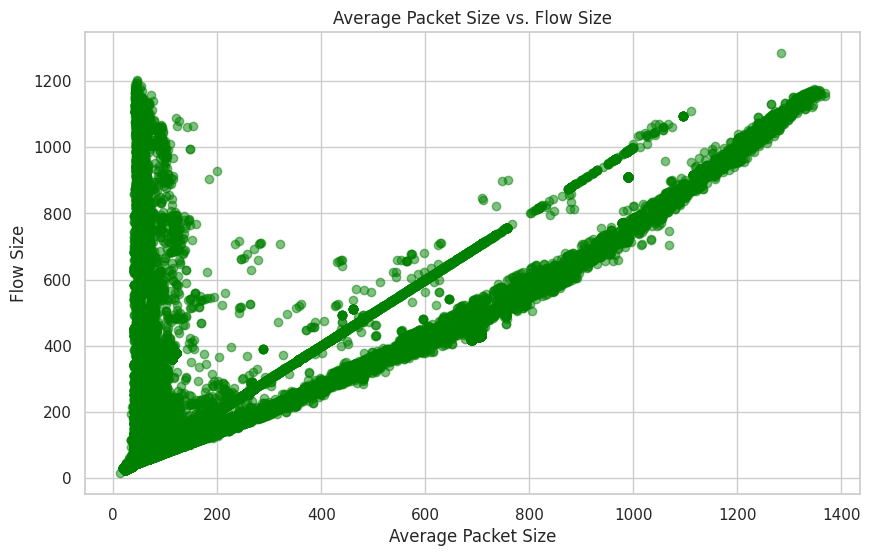

In [62]:
# Scatter plot of avg_packet_size vs. flow_size
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_packet_size'], df['flow_size'], alpha=0.5, color='green')
plt.title('Average Packet Size vs. Flow Size')
plt.xlabel('Average Packet Size')
plt.ylabel('Flow Size')
plt.show()